In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban-building-stock-dataset/urban_building_stock_datasets_17042024.csv
/kaggle/input/lgbm_optimized_eui/other/default/1/lgbm_optimized_eui.pkl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = '/kaggle/input/urban-building-stock-dataset/urban_building_stock_datasets_17042024.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    exit()

Dataset loaded successfully!


In [3]:
!pip install tabulate

In [4]:
from tabulate import tabulate
print("\n--- First 5 rows of the dataset ---")
print(df.head())


--- First 5 rows of the dataset ---
  Simple_Building_Energy_Rating Weather_File  Building_Type  \
0                             A   Historical       Detached   
1                             B   Historical       Bungalow   
2                             A   Historical       Detached   
3                             E   Historical       Bungalow   
4                             A   Historical  Semi Detached   

  Renewable_Energy_Usage  Floor_Insulation_U-Value  Door_Insulation_U-Value  \
0                    Yes                      0.16                     0.81   
1                    Yes                      0.21                     1.01   
2                    Yes                      0.16                     1.01   
3                     No                      0.50                     3.00   
4                    Yes                      0.18                     1.01   

   Roof_Insulation_U-Value  Window_Insulation_U-Value  \
0                     0.10                       0.9

In [5]:
print("\n--- Information about the dataset ---")
df.info()


--- Information about the dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048562 entries, 0 to 1048561
Data columns (total 31 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Simple_Building_Energy_Rating          1048562 non-null  object 
 1   Weather_File                           1048562 non-null  object 
 2   Building_Type                          1048562 non-null  object 
 3   Renewable_Energy_Usage                 1048562 non-null  object 
 4   Floor_Insulation_U-Value               1048562 non-null  float64
 5   Door_Insulation_U-Value                1048562 non-null  float64
 6   Roof_Insulation_U-Value                1048562 non-null  float64
 7   Window_Insulation_U-Value              1048562 non-null  float64
 8   Wall_Insulation_U-Value                1048562 non-null  float64
 9   Building_Energy_Rating                 1048562 non-null  object 
 10  HVA

In [6]:
print("\n--- Summary statistics of numerical columns ---")
print(df.describe())


--- Summary statistics of numerical columns ---
       Floor_Insulation_U-Value  Door_Insulation_U-Value  \
count              1.048562e+06             1.048562e+06   
mean               3.759510e-01             2.289789e+00   
std                2.811865e-01             1.413139e+00   
min                1.500000e-01             8.100000e-01   
25%                1.800000e-01             1.010000e+00   
50%                3.000000e-01             2.190000e+00   
75%                4.400000e-01             2.940000e+00   
max                1.600000e+00             5.700000e+00   

       Roof_Insulation_U-Value  Window_Insulation_U-Value  \
count             1.048562e+06               1.048562e+06   
mean              8.799751e-01               2.447411e+00   
std               7.303162e-01               1.585775e+00   
min               7.000000e-02               7.300000e-01   
25%               1.000000e-01               1.060000e+00   
50%               7.300000e-01              

In [7]:
print("\n--- Number of unique values in categorical columns ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 20:  # Print unique values if few
        print(f"  Unique values: {df[col].unique()}")


--- Number of unique values in categorical columns ---
Simple_Building_Energy_Rating: 7 unique values
  Unique values: ['A' 'B' 'E' 'C' 'G' 'F' 'D']
Weather_File: 2 unique values
  Unique values: ['Historical' '2030']
Building_Type: 4 unique values
  Unique values: ['Detached' 'Bungalow' 'Semi Detached' 'Terraced']
Renewable_Energy_Usage: 2 unique values
  Unique values: ['Yes' 'No']
Building_Energy_Rating: 15 unique values
  Unique values: ['A1' 'B1' 'A2' 'E1' 'B2' 'C3' 'G' 'F' 'B3' 'D2' 'C1' 'C2' 'A3' 'D1' 'E2']


In [8]:
# --- Handling Missing Values ---
print("\n--- Missing values per column ---")
print(df.isnull().sum())


--- Missing values per column ---
Simple_Building_Energy_Rating            0
Weather_File                             0
Building_Type                            0
Renewable_Energy_Usage                   0
Floor_Insulation_U-Value                 0
Door_Insulation_U-Value                  0
Roof_Insulation_U-Value                  0
Window_Insulation_U-Value                0
Wall_Insulation_U-Value                  0
Building_Energy_Rating                   0
HVAC_Efficiency                          0
Domestic_Hot_Water_Usage                 0
Building_Orientation                     0
Lighting_Density                         0
Occupancy_Level                          0
Equipment_Density                        0
Heating_Setpoint_Temperature             0
Heating_Setback_Temperature              0
Air_Change_Rate                          0
Window_to_Wall_Ratio                     0
Total_Building_Area                      0
Total_Heating_Energy                     0
Interior_Lighting_E

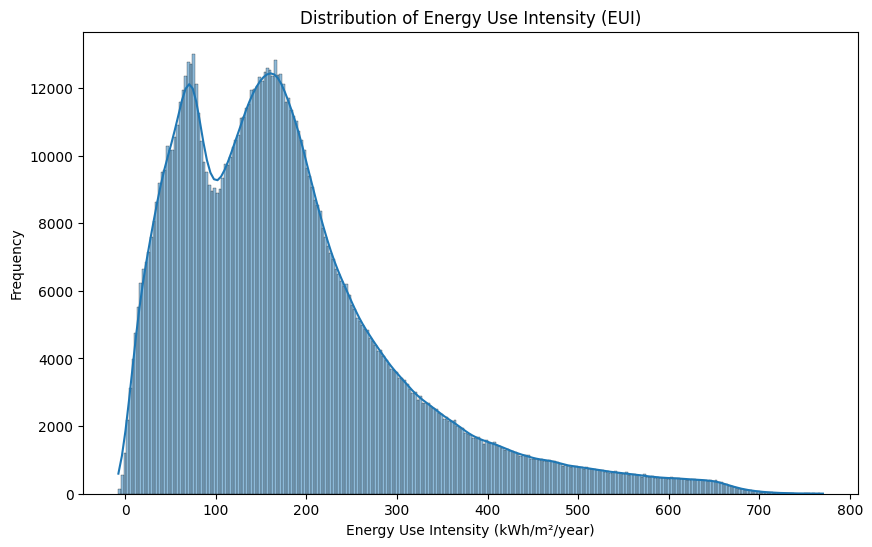

In [9]:

# --- Exploratory Data Analysis and Visualization ---

# 1. Distribution of the target variable (Energy_Use_Intensity - a good primary target)
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy_Use_Intensity'], kde=True)
plt.title('Distribution of Energy Use Intensity (EUI)')
plt.xlabel('Energy Use Intensity (kWh/m²/year)')
plt.ylabel('Frequency')
plt.show()

# Insight: This plot shows the distribution of your primary target variable. Is it normally distributed? Skewed? This can influence your model choice.

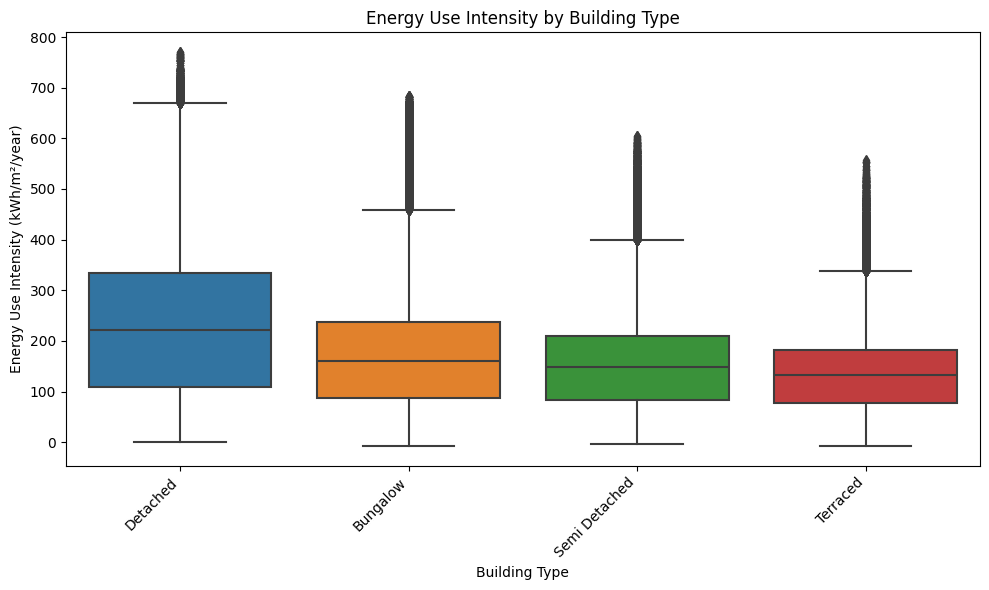

In [10]:

# 2. Energy Use Intensity vs. Building Type (if Building_Type has reasonable categories)
if 'Building_Type' in df.columns and df['Building_Type'].nunique() < 10:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Building_Type', y='Energy_Use_Intensity', data=df)
    plt.title('Energy Use Intensity by Building Type')
    plt.xlabel('Building Type')
    plt.ylabel('Energy Use Intensity (kWh/m²/year)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Insight: This can reveal if certain building types tend to have higher or lower energy consumption.

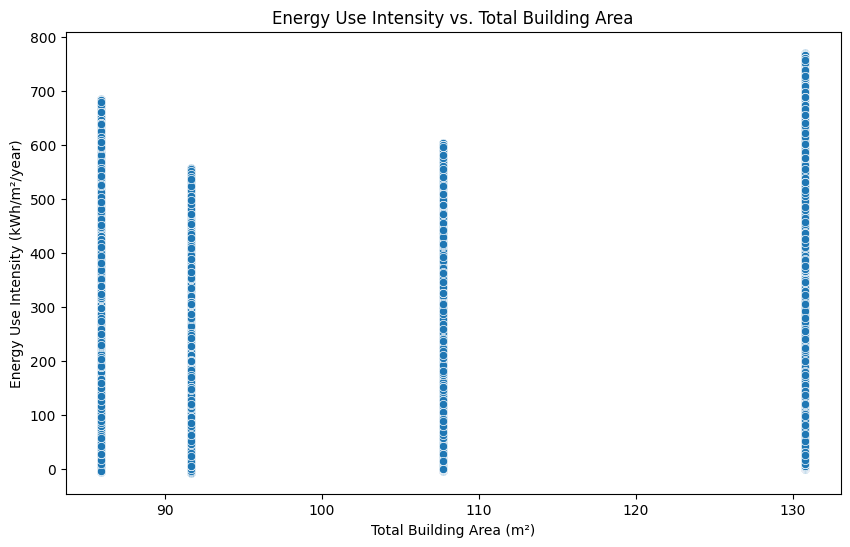

In [11]:

# 3. Energy Use Intensity vs. a numerical feature (e.g., Total_Building_Area)
if 'Total_Building_Area' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Total_Building_Area', y='Energy_Use_Intensity', data=df)
    plt.title('Energy Use Intensity vs. Total Building Area')
    plt.xlabel('Total Building Area (m²)')
    plt.ylabel('Energy Use Intensity (kWh/m²/year)')
    plt.show()

    # Insight: Look for any correlation or patterns between building size and energy consumption.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:783: RuntimeWarning: invalid value encountered in less
  mask_under = xa < 0
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:784: RuntimeWarning: invalid value encountered in greater_equal
  mask_over = xa >= self.N
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


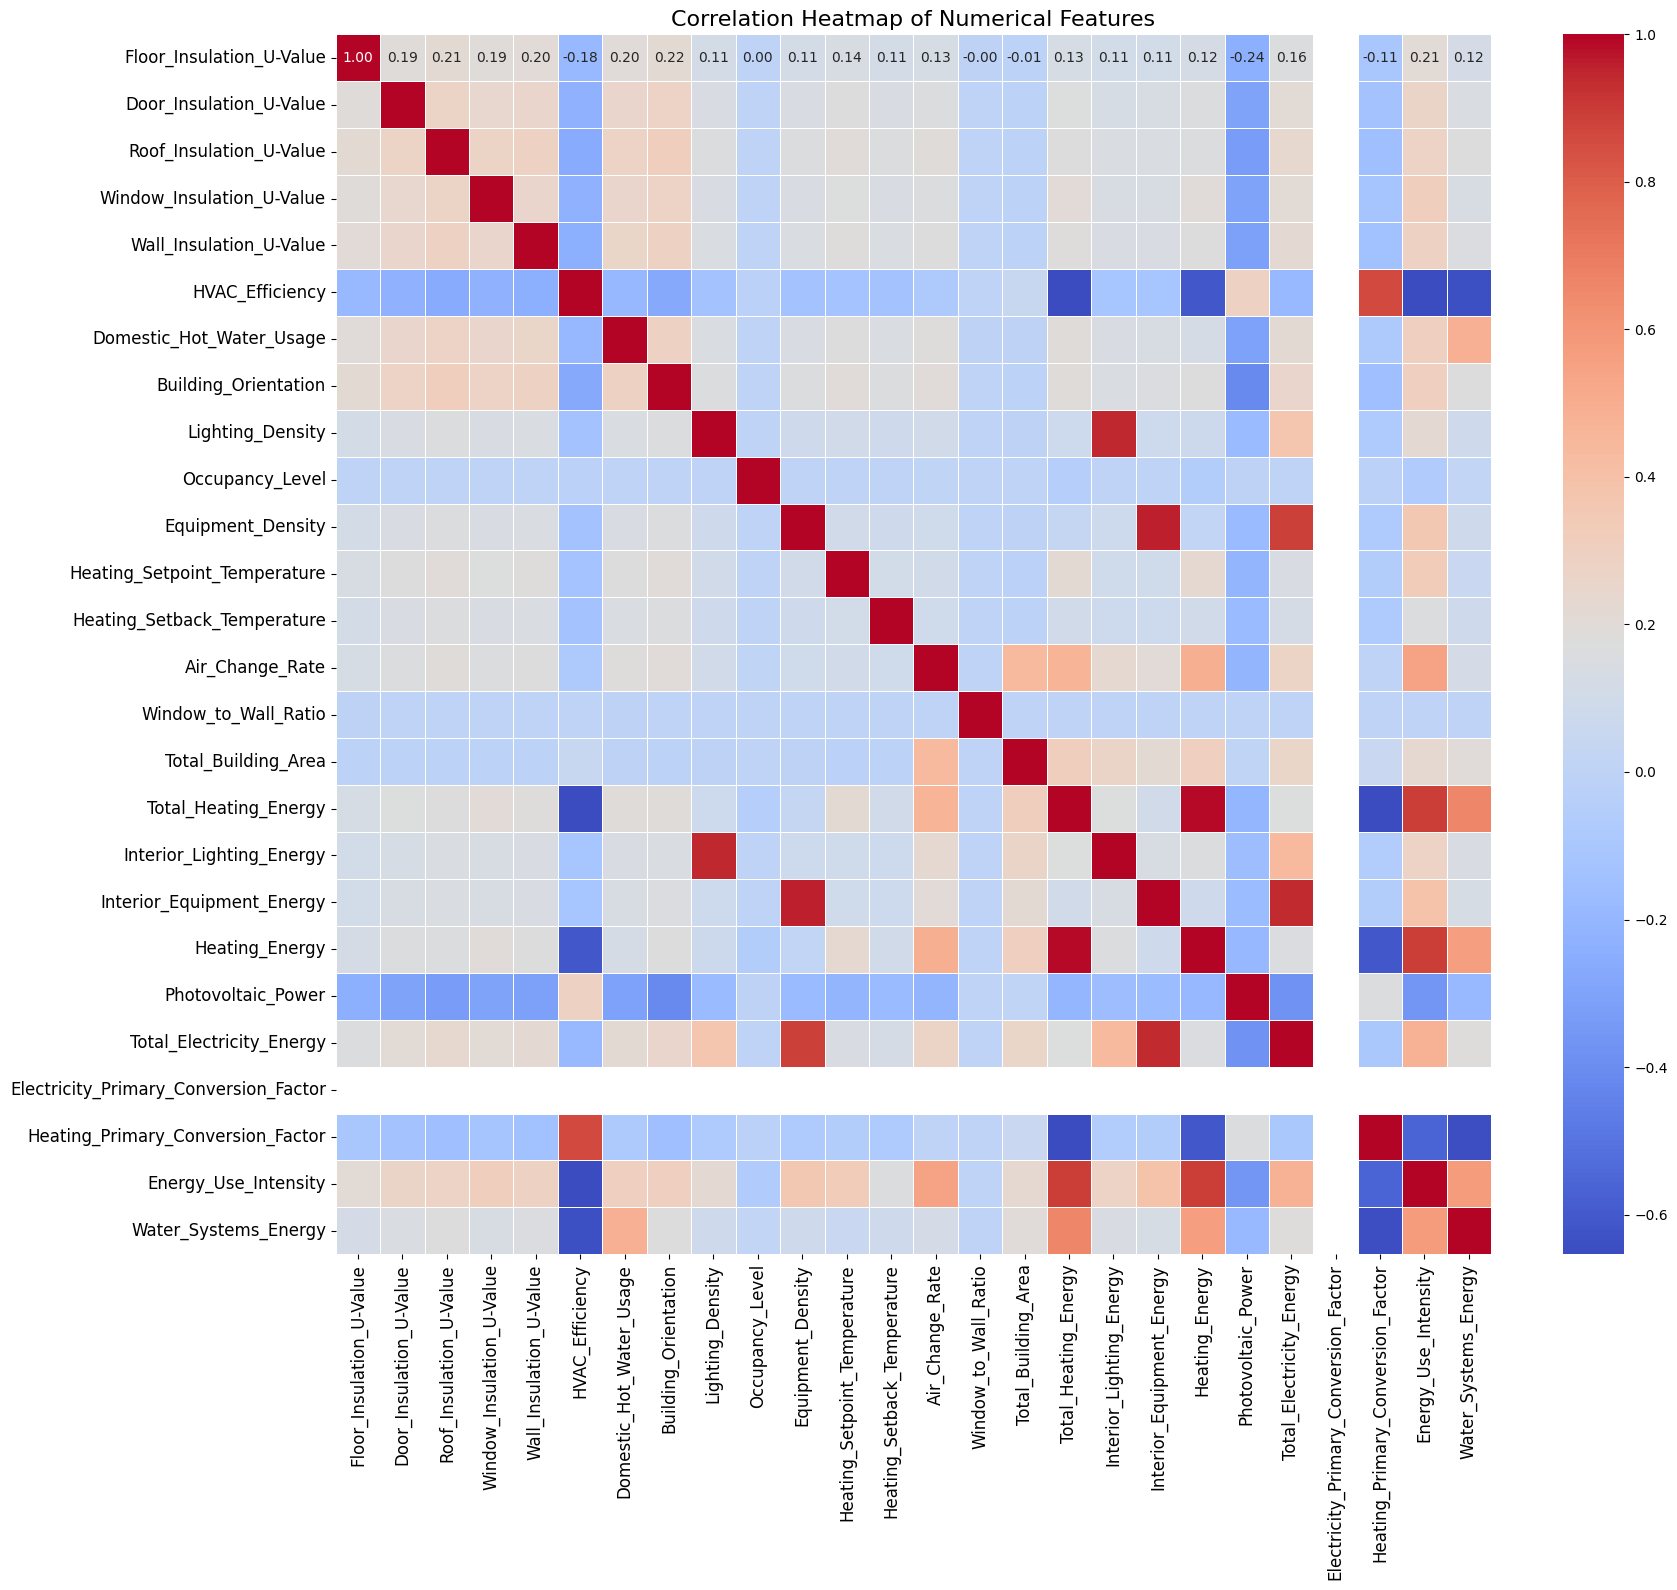

In [12]:
#4. Correlation Heatmap
numerical_cols = df.select_dtypes(include=np.number).columns
# Filter out columns with all null values
numerical_cols = numerical_cols[df[numerical_cols].isnull().sum() < len(df)]
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(18, 16))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={'size': 10}) # Adjust annotation format and size
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

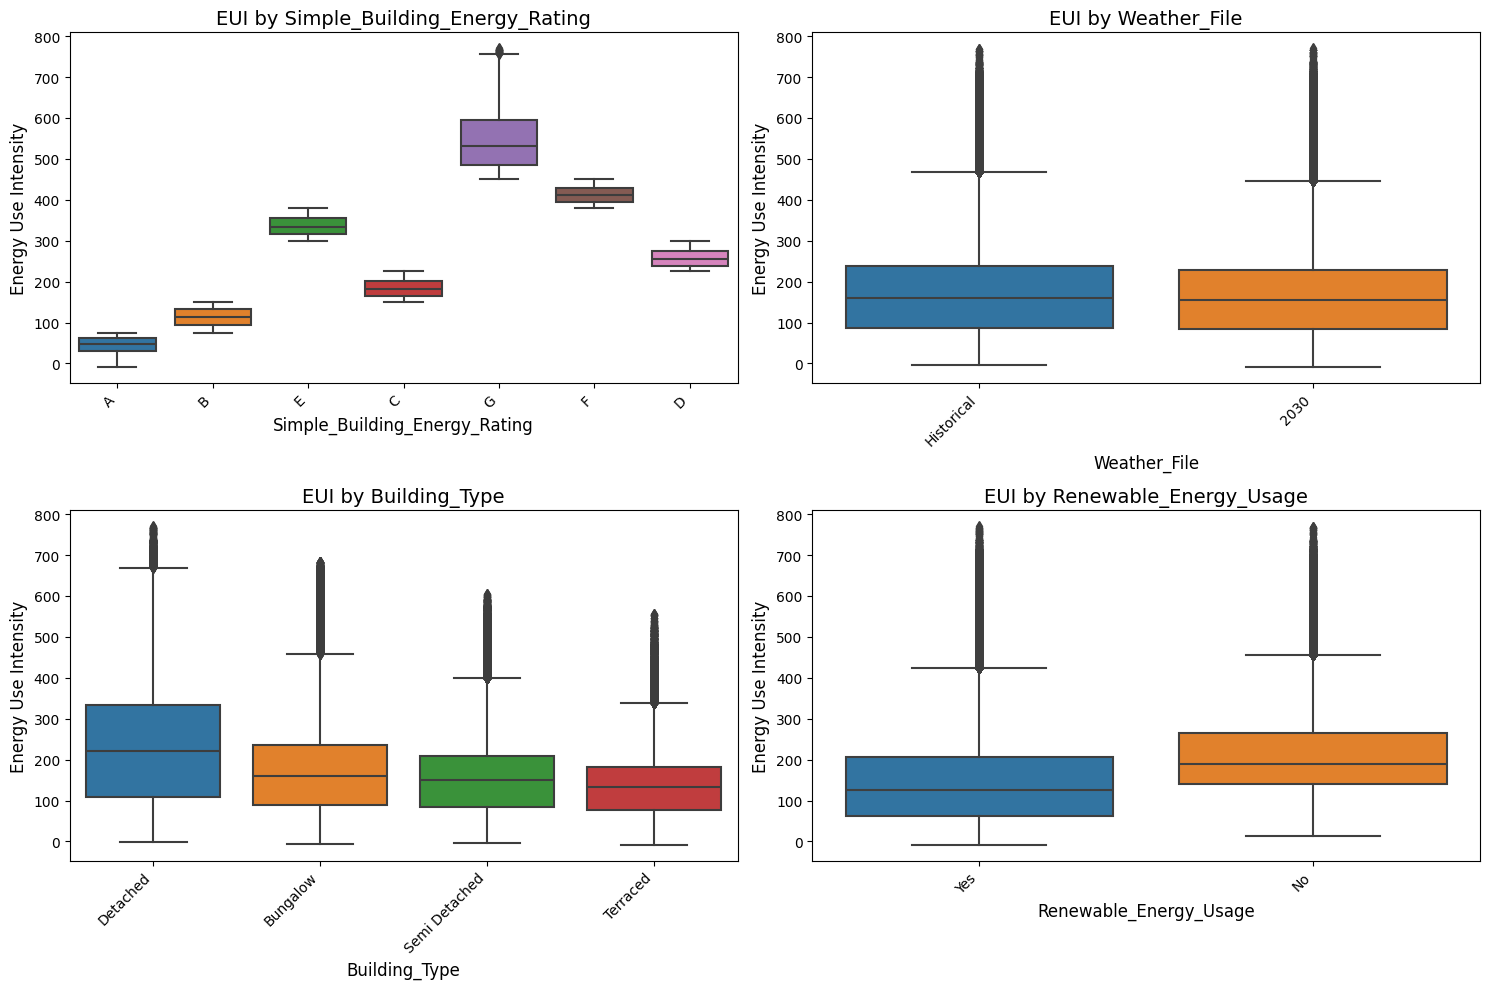

In [13]:
# 6. Box Plots of EUI by Categorical Features (with fewer unique values)
categorical_cols_for_boxplot = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() < 10]
if categorical_cols_for_boxplot:
    num_rows = (len(categorical_cols_for_boxplot) + 1) // 2
    plt.figure(figsize=(15, 5 * num_rows))
    for i, cat_col in enumerate(categorical_cols_for_boxplot):
        plt.subplot(num_rows, 2, i + 1)
        sns.boxplot(x=cat_col, y='Energy_Use_Intensity', data=df)
        plt.title(f'EUI by {cat_col}', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel('Energy Use Intensity', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
    plt.show()
 
    # Insight: These box plots illustrate the distribution of Energy Use Intensity across different categories of the selected categorical features. They can help identify if certain categories tend to have significantly different energy consumption patterns.

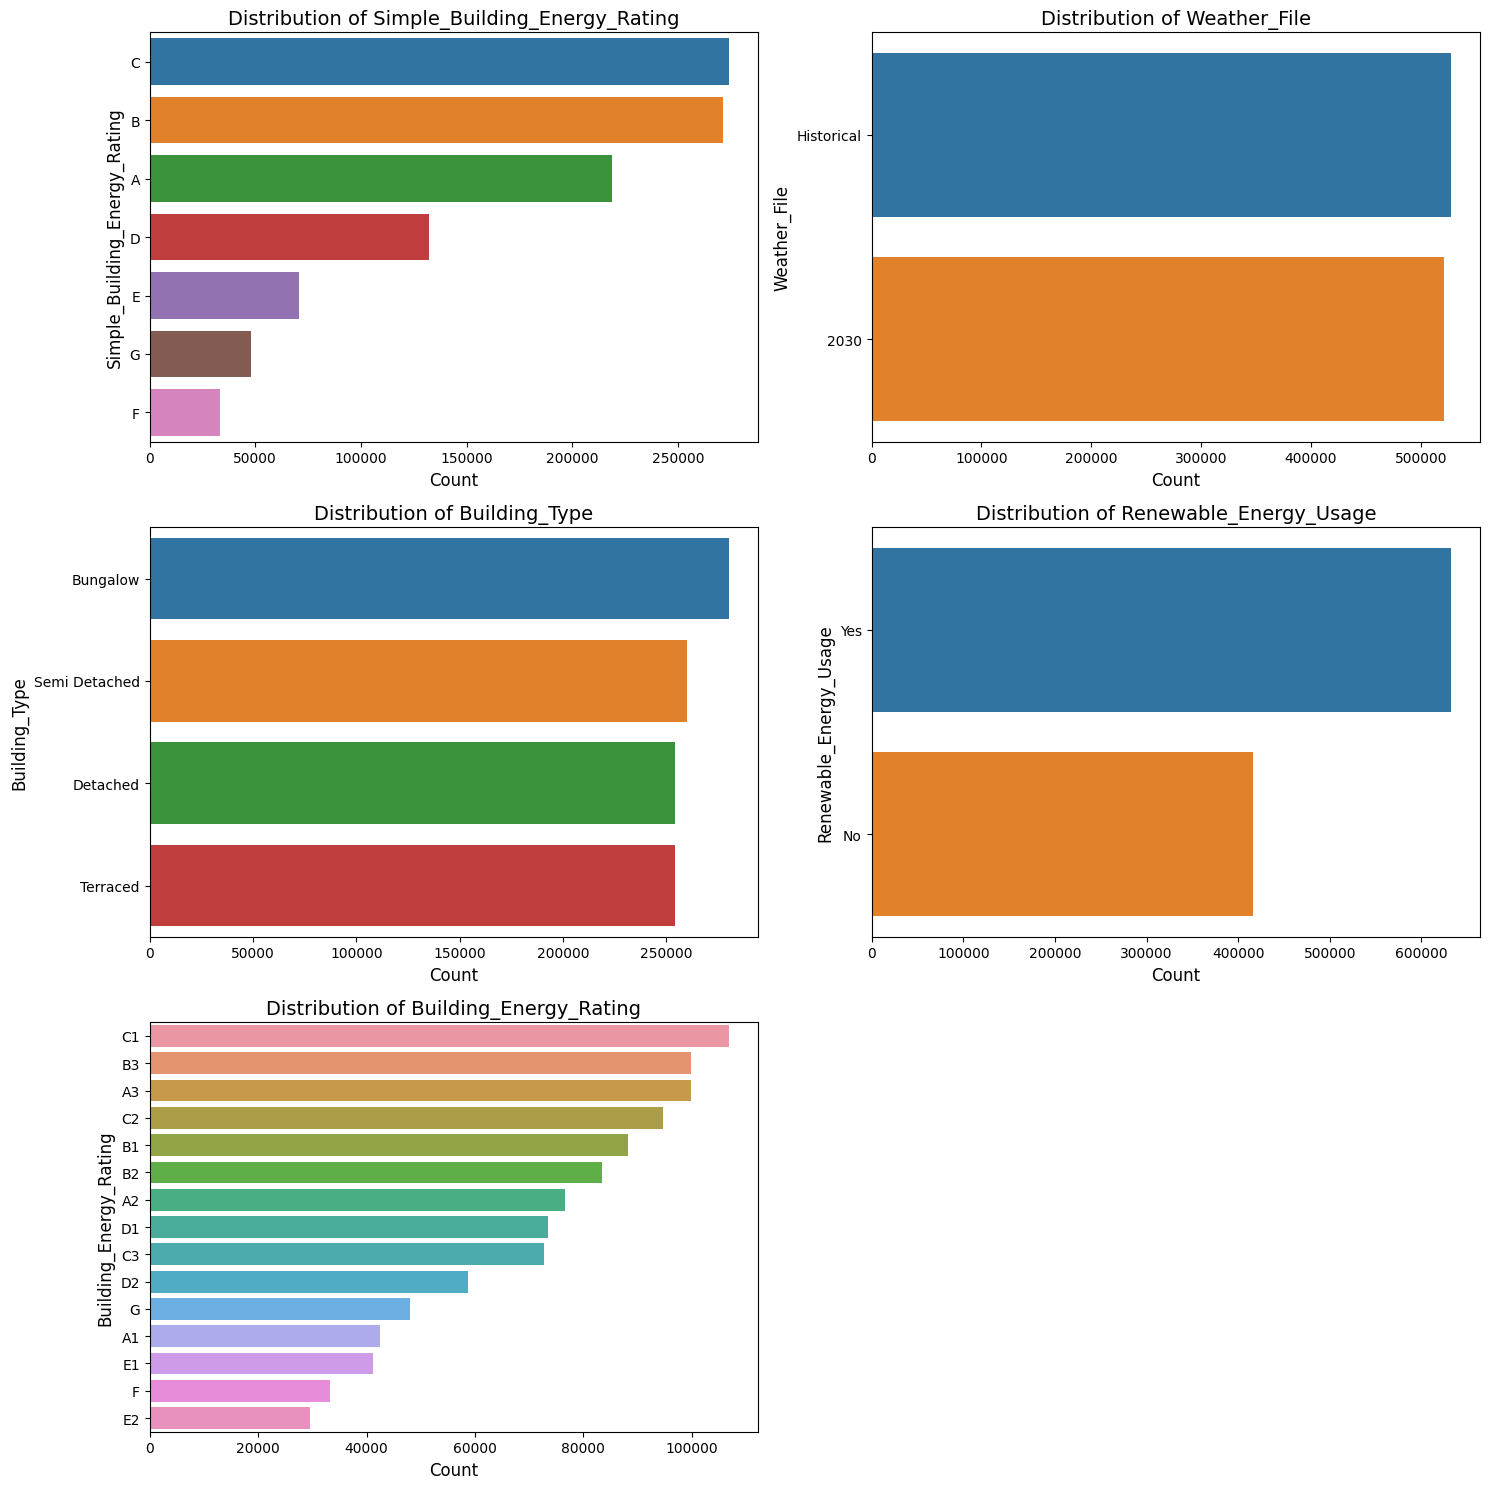

In [14]:
# 7. Bar Plots of Categorical Feature Distributions
categorical_cols_for_barplot = df.select_dtypes(include='object').columns
num_rows_barplot = (len(categorical_cols_for_barplot) + 1) // 2
plt.figure(figsize=(15, 5 * num_rows_barplot))
for i, cat_col in enumerate(categorical_cols_for_barplot):
    plt.subplot(num_rows_barplot, 2, i + 1)
    sns.countplot(y=cat_col, data=df, order=df[cat_col].value_counts().index)
    plt.title(f'Distribution of {cat_col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(cat_col, fontsize=12)
    plt.tight_layout()
plt.show()
# Insight: These bar plots show the frequency of each category within the categorical features, providing an understanding of the class distribution.

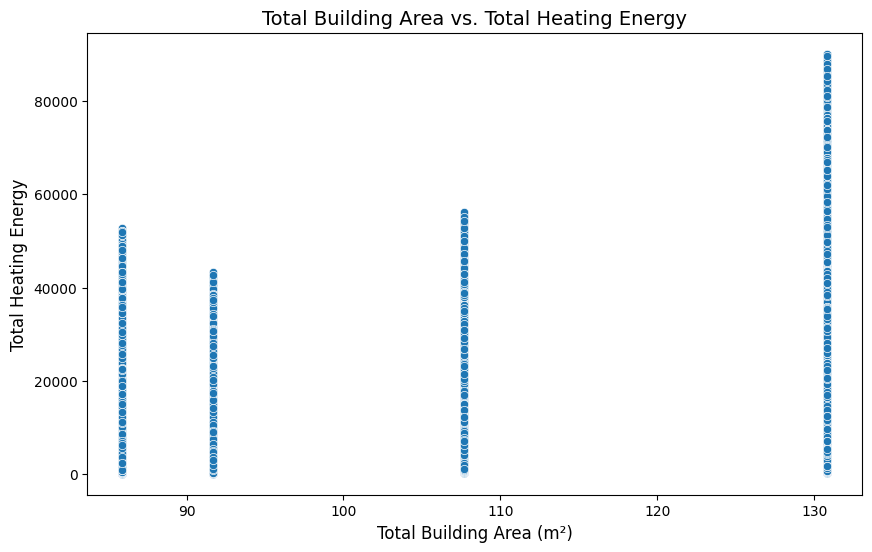

In [15]:
# 8. Scatter Plot of Two Potentially Correlated Numerical Features
# Let's pick two features that might have a relationship (e.g., Total Building Area and Total Heating Energy)
if 'Total_Building_Area' in df.columns and 'Total_Heating_Energy' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Total_Building_Area', y='Total_Heating_Energy', data=df)
    plt.title('Total Building Area vs. Total Heating Energy', fontsize=14)
    plt.xlabel('Total Building Area (m²)', fontsize=12)
    plt.ylabel('Total Heating Energy', fontsize=12)
    plt.show()
    # plt.savefig('scatterplot_area_vs_heating.png')
    # Insight: This scatter plot helps visualize the relationship between two specific numerical features. You can choose features based on the correlation heatmap or your domain knowledge.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


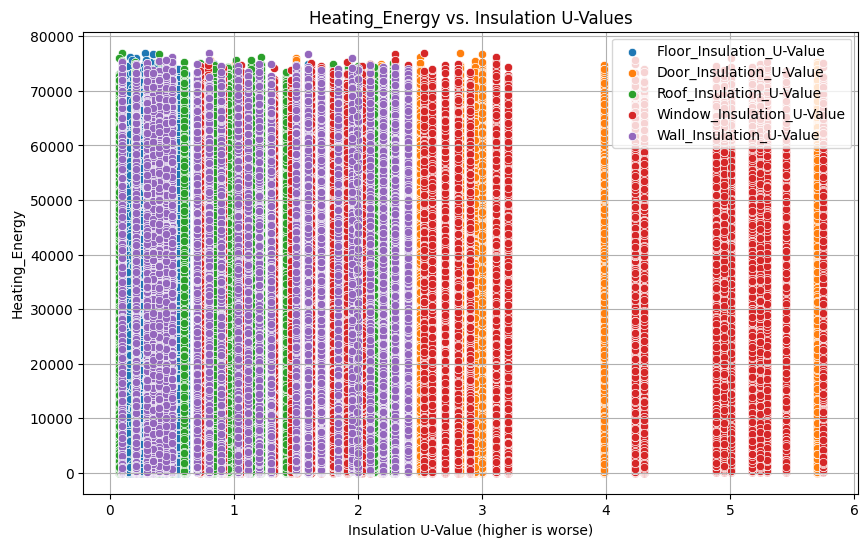

In [16]:

# 9. Let's explore the relationship between insulation values and heating/cooling energy
insulation_cols = [col for col in df.columns if 'Insulation_U-Value' in col]
heating_cols = [col for col in df.columns if 'Heating' in col and 'Total' not in col and 'Setpoint' not in col and 'Setback' not in col and 'Primary' not in col]
if insulation_cols and heating_cols:
    for heat_col in heating_cols:
        plt.figure(figsize=(10, 6))
        for ins_col in insulation_cols:
            sns.scatterplot(x=df[ins_col], y=df[heat_col], label=ins_col)
        plt.title(f'{heat_col} vs. Insulation U-Values')
        plt.xlabel('Insulation U-Value (higher is worse)')
        plt.ylabel(heat_col)
        plt.legend()
        plt.grid(True)
        plt.show()
    # Insight: Lower U-values (better insulation) should ideally correlate with lower heating energy consumption.

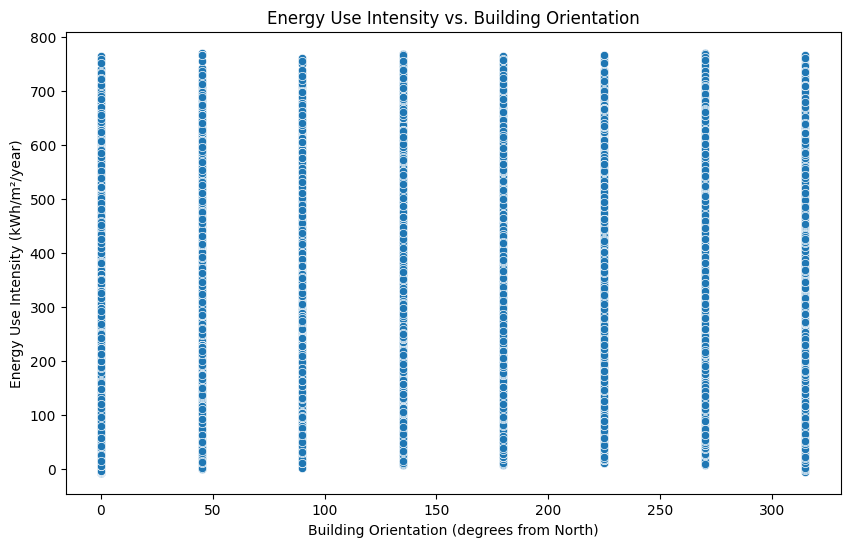

In [17]:

# 10. Impact of Building Orientation on Energy Consumption (if Building_Orientation is numerical)
if 'Building_Orientation' in df.columns and pd.api.types.is_numeric_dtype(df['Building_Orientation']):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Building_Orientation', y='Energy_Use_Intensity', data=df)
    plt.title('Energy Use Intensity vs. Building Orientation')
    plt.xlabel('Building Orientation (degrees from North)')
    plt.ylabel('Energy Use Intensity (kWh/m²/year)')
    plt.show()
    # Insight: Explore if certain orientations lead to higher or lower energy use.


In [18]:
df.shape

(1048562, 31)


--- Handling Outliers (Creating a New DataFrame) ---


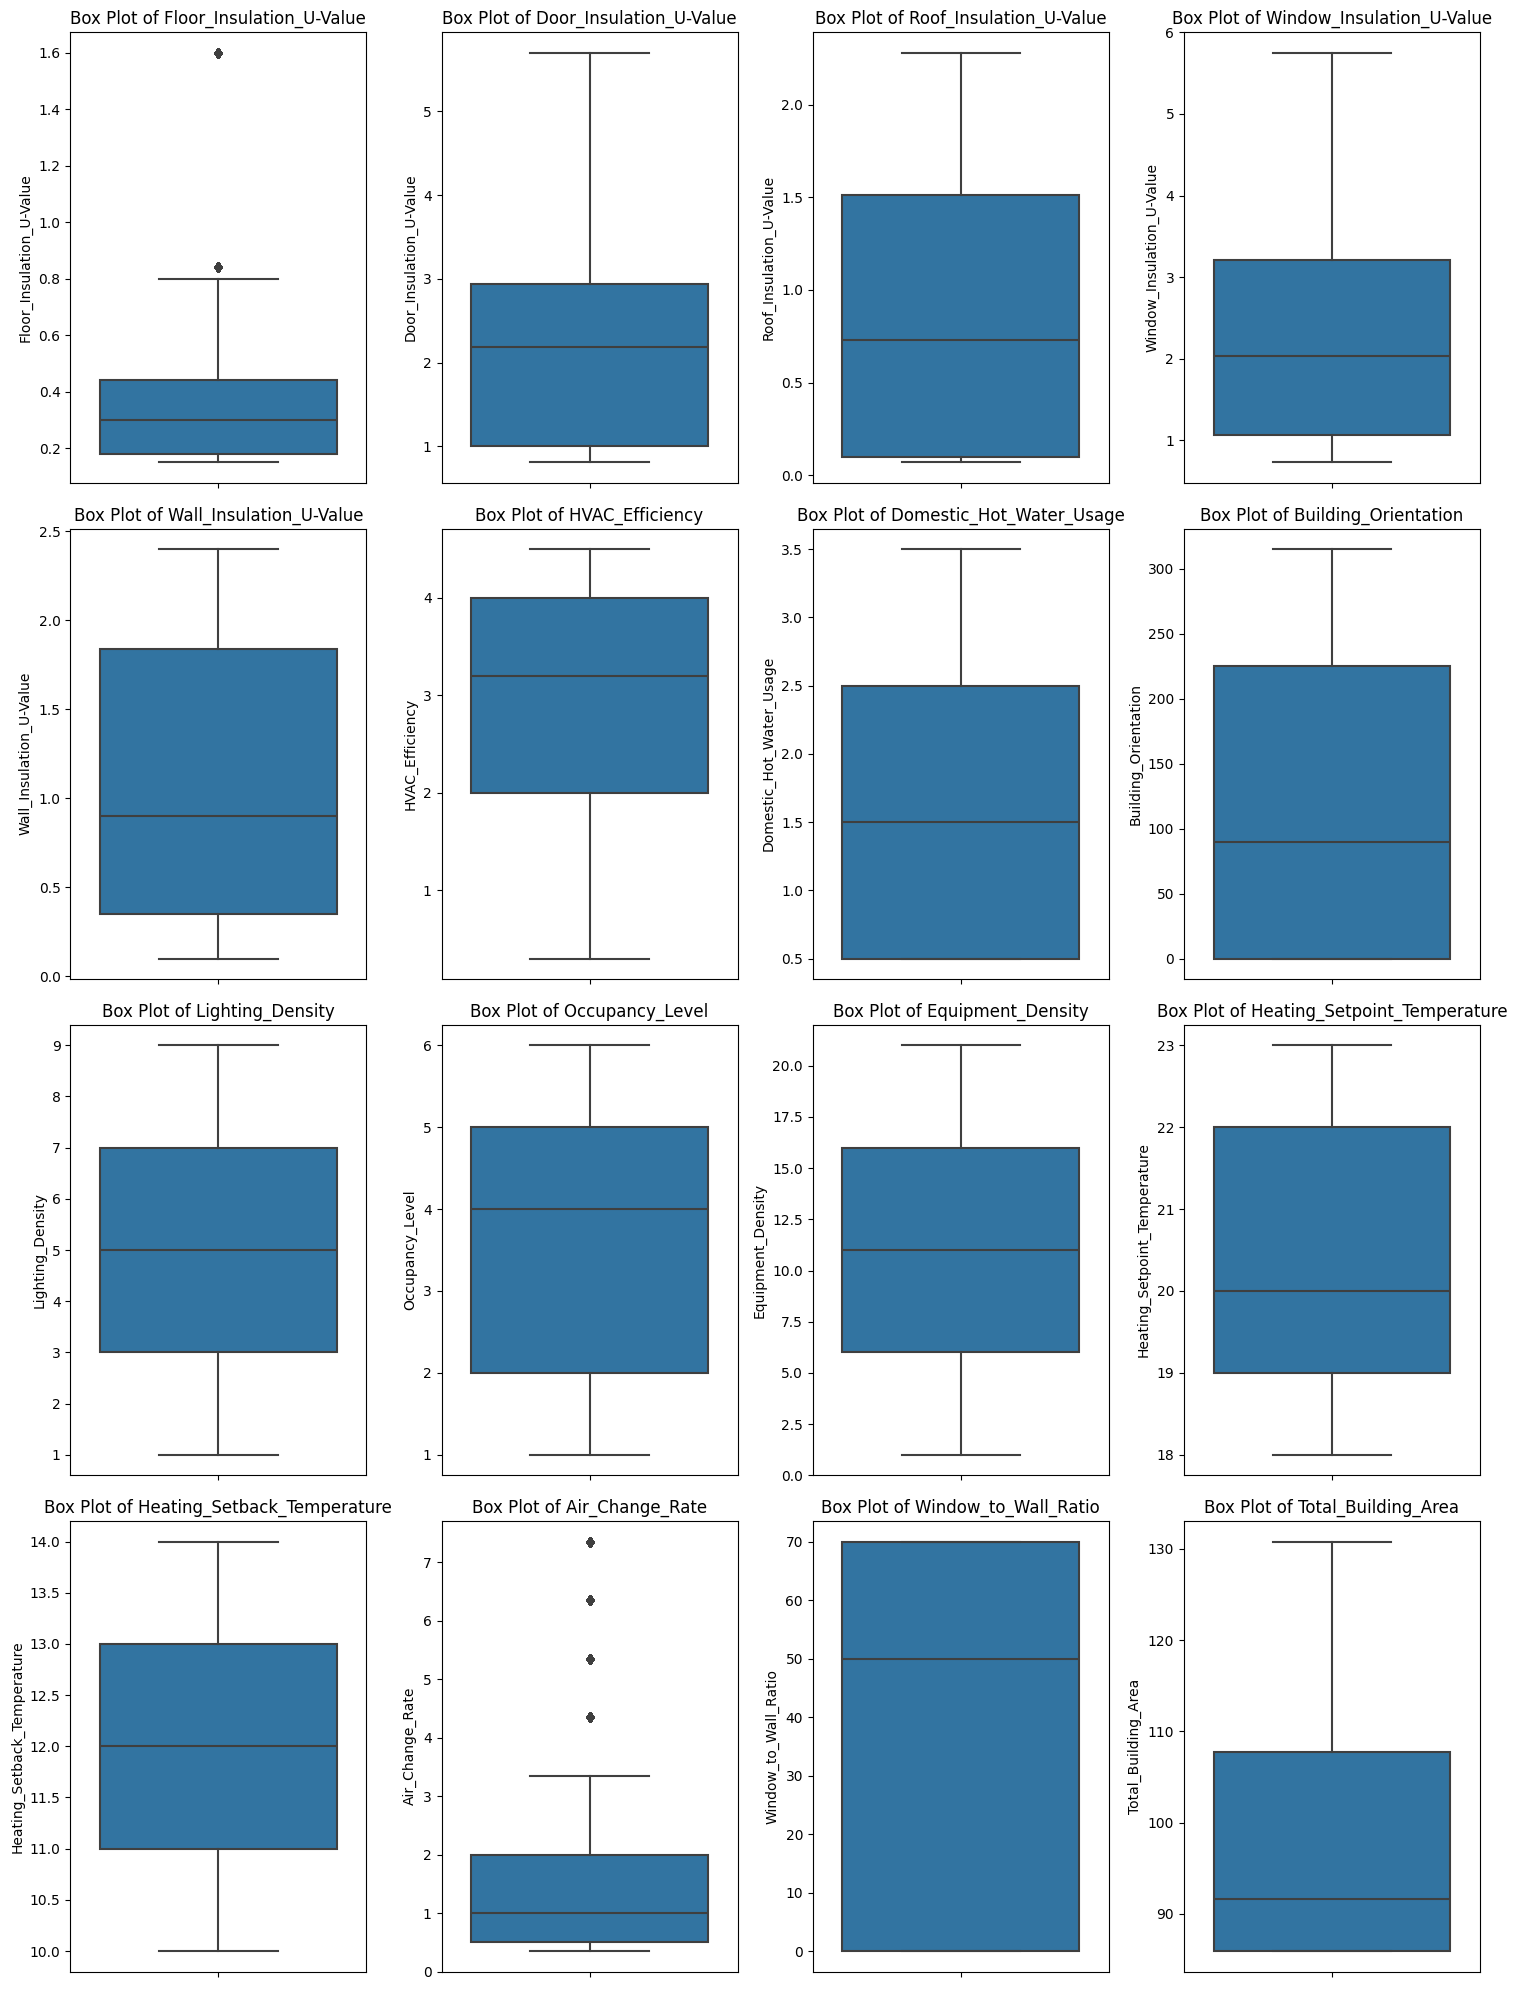

Outliers in 'Floor_Insulation_U-Value' capped using IQR.
Outliers in 'Door_Insulation_U-Value' capped using IQR.
Outliers in 'Roof_Insulation_U-Value' capped using IQR.
Outliers in 'Window_Insulation_U-Value' capped using IQR.
Outliers in 'Wall_Insulation_U-Value' capped using IQR.
Outliers in 'Air_Change_Rate' capped using IQR.

--- Outlier handling complete. The 'df_processed' DataFrame now contains the capped features and the original uncapped features (except those capped). ---


In [19]:
# --- Handling Outliers (Creating a New DataFrame) ---
print("\n--- Handling Outliers (Creating a New DataFrame) ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical input features (optional, for EDA)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
input_numerical_cols = [col for col in numerical_cols if col not in ['Energy_Use_Intensity', 'Total_Heating_Energy', 'Interior_Lighting_Energy', 'Interior_Equipment_Energy', 'Heating_Energy', 'Photovoltaic_Power', 'Total_Electricity_Energy', 'Water_Systems_Energy', 'Electricity_Primary_Conversion_Factor', 'Heating_Primary_Conversion_Factor']]

num_cols = len(input_numerical_cols)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(input_numerical_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Function to cap outliers using the IQR method
def cap_outliers_iqr(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

# Apply outlier capping to selected features and create a new DataFrame
features_to_cap = [
    'Floor_Insulation_U-Value',
    'Door_Insulation_U-Value',
    'Roof_Insulation_U-Value',
    'Window_Insulation_U-Value',
    'Wall_Insulation_U-Value',
    'Air_Change_Rate'
]

df_processed = df.copy()  # Create a copy to avoid modifying the original df

for col in features_to_cap:
    if col in df_processed.columns:
        df_processed[f'{col}_Capped'] = cap_outliers_iqr(df_processed[col])
        print(f"Outliers in '{col}' capped using IQR.")
        df_processed = df_processed.drop(columns=[col])  # Remove the original feature
    else:
        print(f"Warning: Feature '{col}' not found in df_processed for outlier capping.")

print("\n--- Outlier handling complete. The 'df_processed' DataFrame now contains the capped features and the original uncapped features (except those capped). ---")

# Now, 'df_processed' is the DataFrame you should use for the subsequent steps.

In [20]:
df.shape

(1048562, 31)

In [21]:
df_processed.shape

(1048562, 31)


--- Visualize Numerical Features in df_processed after Outlier Capping ---


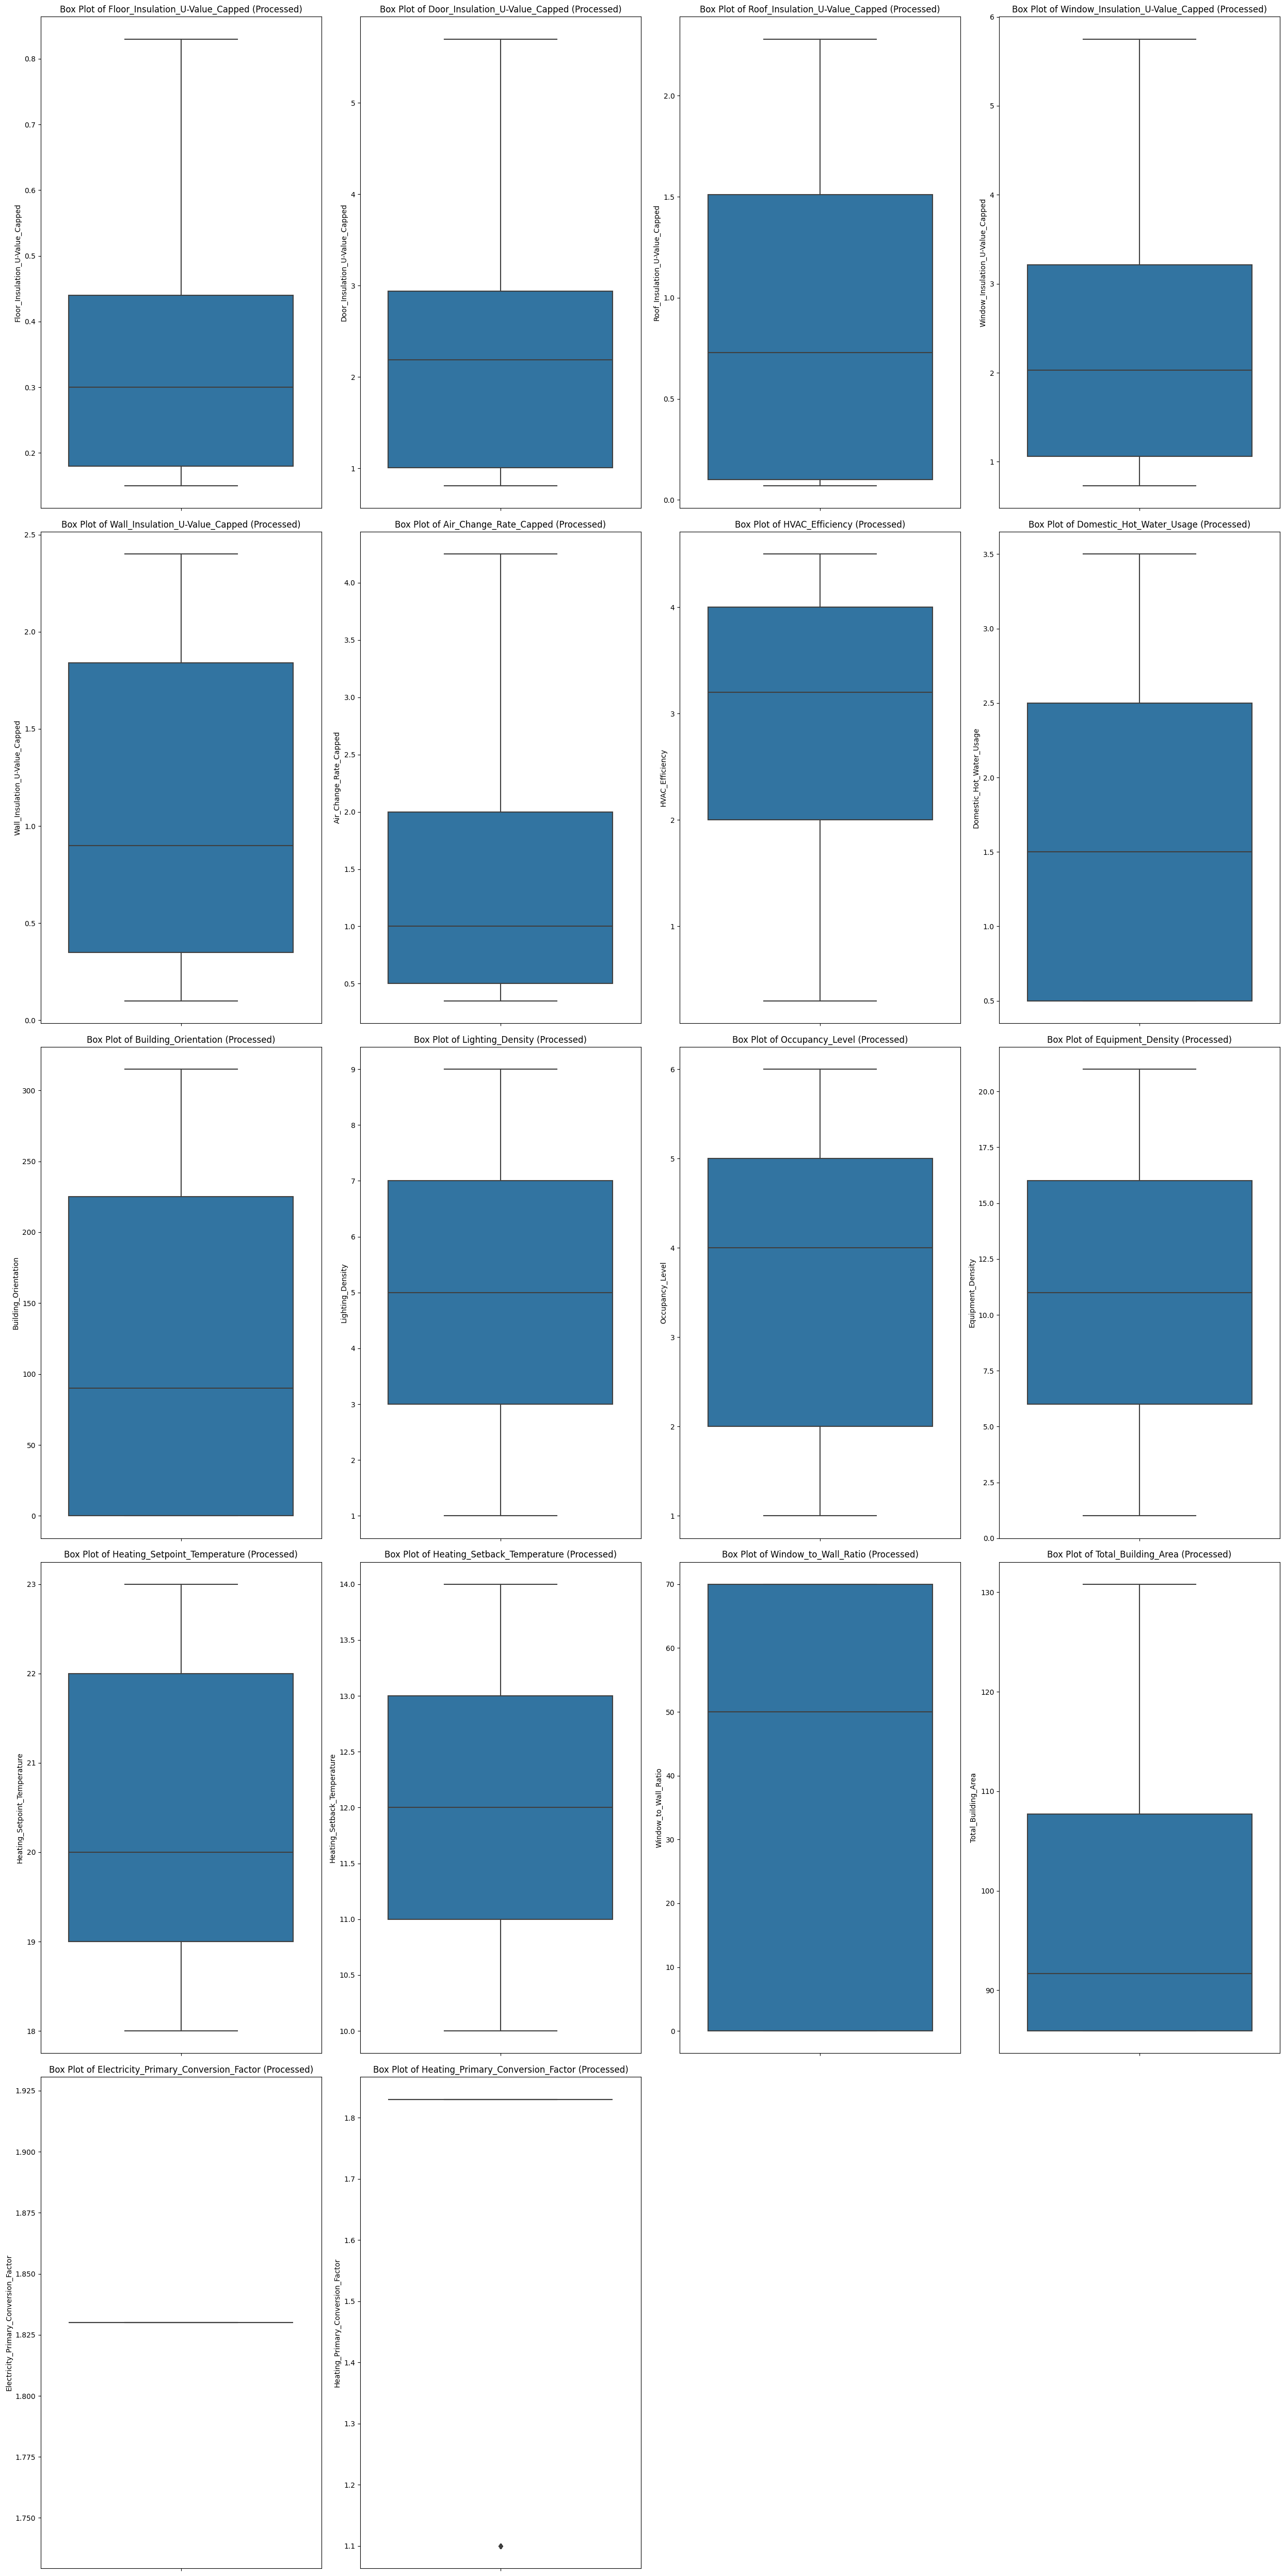


--- Box plots of numerical input features in df_processed are displayed. ---


In [22]:
# --- Visualize Numerical Features in df_processed after Outlier Capping ---
print("\n--- Visualize Numerical Features in df_processed after Outlier Capping ---")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols_processed = df_processed.select_dtypes(include=np.number).columns.tolist()

# Explicitly define the numerical INPUT features AFTER capping
input_numerical_cols_processed = [
    'Floor_Insulation_U-Value_Capped',
    'Door_Insulation_U-Value_Capped',
    'Roof_Insulation_U-Value_Capped',
    'Window_Insulation_U-Value_Capped',
    'Wall_Insulation_U-Value_Capped',
    'Air_Change_Rate_Capped',
    'HVAC_Efficiency',
    'Domestic_Hot_Water_Usage',
    'Building_Orientation',
    'Lighting_Density',
    'Occupancy_Level',
    'Equipment_Density',
    'Heating_Setpoint_Temperature',
    'Heating_Setback_Temperature',
    'Window_to_Wall_Ratio',
    'Total_Building_Area',
    'Electricity_Primary_Conversion_Factor',
    'Heating_Primary_Conversion_Factor'
]

# Filter out any columns that might not be present in df_processed
input_numerical_cols_processed = [col for col in input_numerical_cols_processed if col in df_processed.columns]

num_cols_processed = len(input_numerical_cols_processed)
num_rows_processed = (num_cols_processed + 3) // 4

plt.figure(figsize=(25, 10 * num_rows_processed))
for i, col in enumerate(input_numerical_cols_processed):
    plt.subplot(num_rows_processed, 4, i + 1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Box Plot of {col} (Processed)')
plt.tight_layout()
plt.show()

print("\n--- Box plots of numerical input features in df_processed are displayed. ---")

In [23]:
# --- Check Unique Values of Conversion Factor Features ---
print("\n--- Checking Unique Values of Conversion Factor Features ---")
print(f"Unique values in Electricity_Primary_Conversion_Factor: {df_processed['Electricity_Primary_Conversion_Factor'].nunique()}")
print(f"Unique values in Heating_Primary_Conversion_Factor: {df_processed['Heating_Primary_Conversion_Factor'].nunique()}")
print(f"\nValue counts for Electricity_Primary_Conversion_Factor:\n{df_processed['Electricity_Primary_Conversion_Factor'].value_counts()}")
print(f"\nValue counts for Heating_Primary_Conversion_Factor:\n{df_processed['Heating_Primary_Conversion_Factor'].value_counts()}")


--- Checking Unique Values of Conversion Factor Features ---
Unique values in Electricity_Primary_Conversion_Factor: 1
Unique values in Heating_Primary_Conversion_Factor: 2

Value counts for Electricity_Primary_Conversion_Factor:
1.83    1048562
Name: Electricity_Primary_Conversion_Factor, dtype: int64

Value counts for Heating_Primary_Conversion_Factor:
1.83    811920
1.10    236642
Name: Heating_Primary_Conversion_Factor, dtype: int64


In [24]:
# --- Drop Low Variance Conversion Factor Features from df_processed ---
print("\n--- Dropping Low Variance Conversion Factor Features from df_processed ---")

columns_to_drop = ['Electricity_Primary_Conversion_Factor', 'Heating_Primary_Conversion_Factor']

# Drop the columns if they exist in df_processed
columns_dropped = [col for col in columns_to_drop if col in df_processed.columns]
df_processed = df_processed.drop(columns=columns_dropped, errors='ignore')

print(f"Dropped columns from df_processed: {columns_dropped}")
print(f"Shape of df_processed after dropping columns: {df_processed.shape}")

print("\n--- Low variance conversion factor features have been dropped from df_processed. ---")


--- Dropping Low Variance Conversion Factor Features from df_processed ---
Dropped columns from df_processed: ['Electricity_Primary_Conversion_Factor', 'Heating_Primary_Conversion_Factor']
Shape of df_processed after dropping columns: (1048562, 29)

--- Low variance conversion factor features have been dropped from df_processed. ---



--- Visualize Categorical Features in df_processed ---


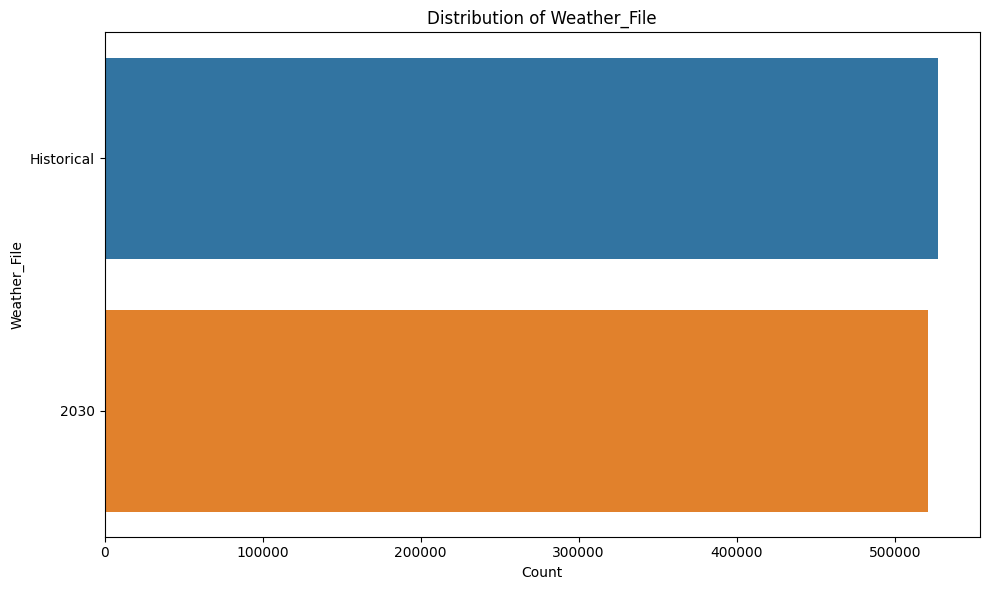

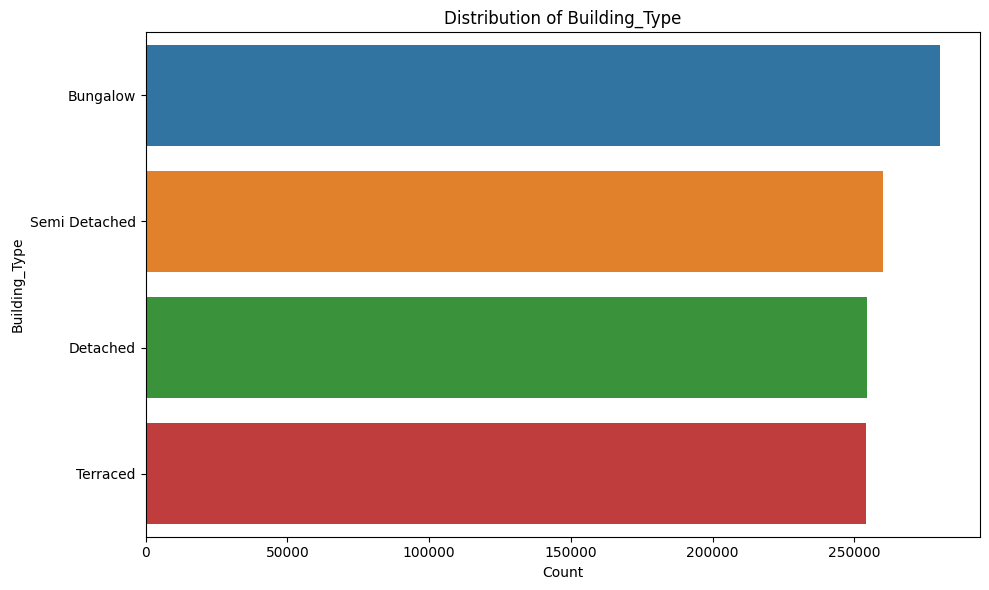

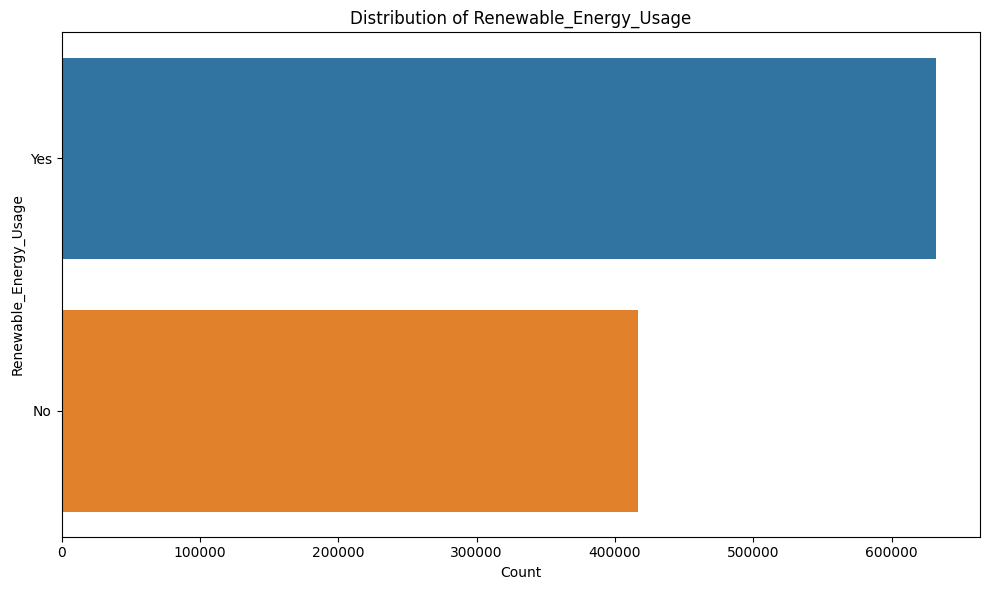

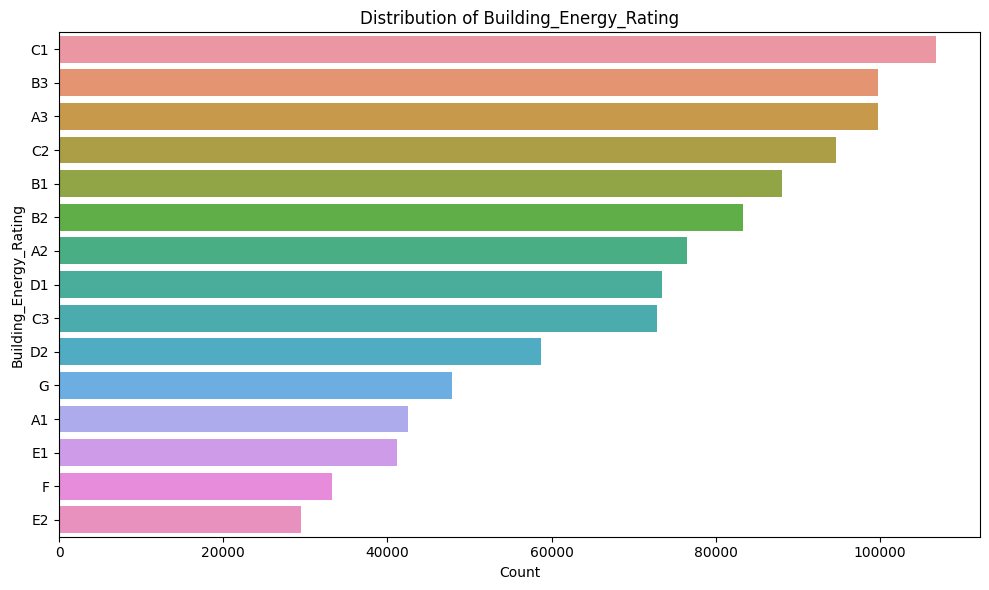


--- Bar plots of categorical features in df_processed are displayed. ---


In [25]:
# --- Visualize Categorical Features in df_processed ---
print("\n--- Visualize Categorical Features in df_processed ---")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'Weather_File',
    'Building_Type',
    'Renewable_Energy_Usage',
    'Building_Energy_Rating'
]

for col in categorical_cols:
    if col in df_processed.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_processed, y=col, order=df_processed[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Categorical column '{col}' not found in df_processed.")

print("\n--- Bar plots of categorical features in df_processed are displayed. ---")

In [26]:
# --- Check Columns in df_processed ---
print("\n--- Columns in df_processed ---")
print(df_processed.columns)


--- Columns in df_processed ---
Index(['Simple_Building_Energy_Rating', 'Weather_File', 'Building_Type',
       'Renewable_Energy_Usage', 'Building_Energy_Rating', 'HVAC_Efficiency',
       'Domestic_Hot_Water_Usage', 'Building_Orientation', 'Lighting_Density',
       'Occupancy_Level', 'Equipment_Density', 'Heating_Setpoint_Temperature',
       'Heating_Setback_Temperature', 'Window_to_Wall_Ratio',
       'Total_Building_Area', 'Total_Heating_Energy',
       'Interior_Lighting_Energy', 'Interior_Equipment_Energy',
       'Heating_Energy', 'Photovoltaic_Power', 'Total_Electricity_Energy',
       'Energy_Use_Intensity', 'Water_Systems_Energy',
       'Floor_Insulation_U-Value_Capped', 'Door_Insulation_U-Value_Capped',
       'Roof_Insulation_U-Value_Capped', 'Window_Insulation_U-Value_Capped',
       'Wall_Insulation_U-Value_Capped', 'Air_Change_Rate_Capped'],
      dtype='object')


In [27]:
df_processed.head()

,Simple_Building_Energy_Rating,Weather_File,Building_Type,Renewable_Energy_Usage,Building_Energy_Rating,HVAC_Efficiency,Domestic_Hot_Water_Usage,Building_Orientation,Lighting_Density,Occupancy_Level,...,Photovoltaic_Power,Total_Electricity_Energy,Energy_Use_Intensity,Water_Systems_Energy,Floor_Insulation_U-Value_Capped,Door_Insulation_U-Value_Capped,Roof_Insulation_U-Value_Capped,Window_Insulation_U-Value_Capped,Wall_Insulation_U-Value_Capped,Air_Change_Rate_Capped
0,A,Historical,Detached,Yes,A1,4.2,0.5,0,1,6,...,974.475,-216.530,9.762398,195.104762,0.16,0.81,0.10,0.91,0.21,0.50
1,B,Historical,Bungalow,Yes,B1,3.6,3.5,315,1,5,...,856.865,857.782,80.604384,616.511111,0.21,1.01,2.13,5.45,1.03,1.50
2,A,Historical,Detached,Yes,A2,4.3,0.5,0,1,6,...,974.475,1729.720,38.035238,190.567442,0.16,1.01,0.07,0.79,0.30,0.35
3,E,Historical,Bungalow,No,E1,2.2,2.5,315,5,5,...,0.000,6163.258,317.290733,720.600000,0.50,3.00,0.60,0.79,1.50,1.00
4,A,Historical,Semi Detached,Yes,A2,4.1,0.5,0,3,5,...,963.467,1736.636,42.622388,164.539024,0.18,1.01,0.10,0.79,0.10,0.50


In [28]:
# --- 1. Identify Original Target Columns ---
original_target_columns = [
    'Simple_Building_Energy_Rating',
    'Energy_Use_Intensity',
    'Total_Heating_Energy',
    'Water_Systems_Energy',
    'Interior_Lighting_Energy',
    'Interior_Equipment_Energy',
    'Photovoltaic_Power',
    'Total_Electricity_Energy','Heating_Energy'
]

In [29]:
# --- 2. Create a New DataFrame for EUI Prediction ---
df_eui = df_processed.copy()

In [30]:
# --- 3. Separate Target (y) and Features (X) for EUI Prediction ---
target_column_eui = 'Energy_Use_Intensity'
if target_column_eui not in df_eui.columns:
    print(f"Error: Target column '{target_column_eui}' not found in df_eui.")
    exit()
y_eui = df_eui[target_column_eui]
X_eui = df_eui.drop(columns=[target_column_eui], errors='ignore')

In [31]:
# --- 4. Drop Other Original Target Columns from Features (X_eui) ---
features_to_drop_eui = [col for col in original_target_columns if col != target_column_eui and col in X_eui.columns]
X_eui = X_eui.drop(columns=features_to_drop_eui, errors='ignore')
print(f"Dropped original target columns from X_eui: {features_to_drop_eui}")

Dropped original target columns from X_eui: ['Simple_Building_Energy_Rating', 'Total_Heating_Energy', 'Water_Systems_Energy', 'Interior_Lighting_Energy', 'Interior_Equipment_Energy', 'Photovoltaic_Power', 'Total_Electricity_Energy', 'Heating_Energy']


In [32]:
# --- 5. Drop 'Building_Energy_Rating' from Features (X_eui) ---
if 'Building_Energy_Rating' in X_eui.columns:
    X_eui = X_eui.drop(columns=['Building_Energy_Rating'], errors='ignore')
    print("Dropped 'Building_Energy_Rating' from X_eui.")
else:
    print("'Building_Energy_Rating' not found in X_eui (already dropped or not present).")

Dropped 'Building_Energy_Rating' from X_eui.


In [33]:
# --- 6. Identify Feature Types in X_eui ---
print("\n--- Identify Feature Types in X_eui ---")
categorical_features_eui = X_eui.select_dtypes(include=['object']).columns.tolist()
numerical_features_eui = X_eui.select_dtypes(include=np.number).columns.tolist()

print(f"Categorical features in X_eui: {categorical_features_eui}")
print(f"Numerical features in X_eui: {numerical_features_eui}")


--- Identify Feature Types in X_eui ---
Categorical features in X_eui: ['Weather_File', 'Building_Type', 'Renewable_Energy_Usage']
Numerical features in X_eui: ['HVAC_Efficiency', 'Domestic_Hot_Water_Usage', 'Building_Orientation', 'Lighting_Density', 'Occupancy_Level', 'Equipment_Density', 'Heating_Setpoint_Temperature', 'Heating_Setback_Temperature', 'Window_to_Wall_Ratio', 'Total_Building_Area', 'Floor_Insulation_U-Value_Capped', 'Door_Insulation_U-Value_Capped', 'Roof_Insulation_U-Value_Capped', 'Window_Insulation_U-Value_Capped', 'Wall_Insulation_U-Value_Capped', 'Air_Change_Rate_Capped']


In [34]:
# --- 7. Preprocess the Data for EUI Prediction using ColumnTransformer ---
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle  # Import pickle for saving

print("\n--- Preprocess the Data for EUI Prediction using ColumnTransformer (Ordinal Encoding) ---")

# Numerical transformer remains the same
numerical_transformer_eui = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer now uses OrdinalEncoder
categorical_transformer_eui = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Handle unknown values
])

preprocessor_eui = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_eui, numerical_features_eui),
        ('cat', categorical_transformer_eui, categorical_features_eui)])

# Split the data into training and testing sets
X_train_eui, X_test_eui, y_train_eui, y_test_eui = train_test_split(X_eui, y_eui, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both training and testing data
preprocessor_eui.fit(X_train_eui) # Fit here
X_train_processed_eui = preprocessor_eui.transform(X_train_eui)
X_test_processed_eui = preprocessor_eui.transform(X_test_eui)

# Save the preprocessor
with open('preprocessor_eui_ordinal.pkl', 'wb') as file:
    pickle.dump(preprocessor_eui, file)
print("Preprocessor (preprocessor_eui_ordinal) saved to 'preprocessor_eui_ordinal.pkl'")

# The processed data will now have the same number of columns as the original
# numerical features plus one column for each categorical feature.

# Create processed DataFrames
column_names = numerical_features_eui + categorical_features_eui
X_train_processed_eui = pd.DataFrame(X_train_processed_eui, columns=column_names)
X_test_processed_eui = pd.DataFrame(X_test_processed_eui, columns=column_names)

print("\nPreprocessing complete for EUI prediction (using Ordinal Encoding).")
print(f"Shape of processed X_train_processed_eui: {X_train_processed_eui.shape}")
print(f"Shape of processed X_test_processed_eui: {X_test_processed_eui.shape}")
print(f"Shape of y_train_eui: {y_train_eui.shape}")
print(f"Shape of y_test_eui: {y_test_eui.shape}")
print(f"\nFeatures in processed X_train_eui: {X_train_processed_eui.columns.tolist()}")


--- Preprocess the Data for EUI Prediction using ColumnTransformer (Ordinal Encoding) ---
Preprocessor (preprocessor_eui_ordinal) saved to 'preprocessor_eui_ordinal.pkl'

Preprocessing complete for EUI prediction (using Ordinal Encoding).
Shape of processed X_train_processed_eui: (838849, 19)
Shape of processed X_test_processed_eui: (209713, 19)
Shape of y_train_eui: (838849,)
Shape of y_test_eui: (209713,)

Features in processed X_train_eui: ['HVAC_Efficiency', 'Domestic_Hot_Water_Usage', 'Building_Orientation', 'Lighting_Density', 'Occupancy_Level', 'Equipment_Density', 'Heating_Setpoint_Temperature', 'Heating_Setback_Temperature', 'Window_to_Wall_Ratio', 'Total_Building_Area', 'Floor_Insulation_U-Value_Capped', 'Door_Insulation_U-Value_Capped', 'Roof_Insulation_U-Value_Capped', 'Window_Insulation_U-Value_Capped', 'Wall_Insulation_U-Value_Capped', 'Air_Change_Rate_Capped', 'Weather_File', 'Building_Type', 'Renewable_Energy_Usage']


In [35]:
X_train_processed_eui.columns.to_frame()

,0
HVAC_Efficiency,HVAC_Efficiency
Domestic_Hot_Water_Usage,Domestic_Hot_Water_Usage
Building_Orientation,Building_Orientation
Lighting_Density,Lighting_Density
Occupancy_Level,Occupancy_Level
Equipment_Density,Equipment_Density
Heating_Setpoint_Temperature,Heating_Setpoint_Temperature
Heating_Setback_Temperature,Heating_Setback_Temperature
Window_to_Wall_Ratio,Window_to_Wall_Ratio
Total_Building_Area,Total_Building_Area


In [36]:
y_train_eui.name

'Energy_Use_Intensity'

In [37]:
numerical_features_eui

['HVAC_Efficiency',
 'Domestic_Hot_Water_Usage',
 'Building_Orientation',
 'Lighting_Density',
 'Occupancy_Level',
 'Equipment_Density',
 'Heating_Setpoint_Temperature',
 'Heating_Setback_Temperature',
 'Window_to_Wall_Ratio',
 'Total_Building_Area',
 'Floor_Insulation_U-Value_Capped',
 'Door_Insulation_U-Value_Capped',
 'Roof_Insulation_U-Value_Capped',
 'Window_Insulation_U-Value_Capped',
 'Wall_Insulation_U-Value_Capped',
 'Air_Change_Rate_Capped']

In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import pickle  # Import pickle for saving
from sklearn.metrics import accuracy_score  # Import accuracy_score

print("\n--- 1. XGBoost Model Training (Without Optimization) for EUI ---")

# Initialize XGBoost Regressor with potential GPU usage
xgb_model_eui = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist',  # Use hist for potential GPU or faster CPU
    device='cuda'      # Try to use CUDA, XGBoost will revert to CPU if not available
)

# Train the model
xgb_model_eui.fit(X_train_processed_eui, y_train_eui)

# Save the trained XGBoost model
with open('xgb_model_eui_ordinal.pkl', 'wb') as file:
    pickle.dump(xgb_model_eui, file)
print("Trained XGBoost model (xgb_model_eui_ordinal) saved to 'xgb_model_eui_ordinal.pkl'")

# Make predictions on the test set
y_pred_eui = xgb_model_eui.predict(X_test_processed_eui)

# Evaluate the model
mse_eui = mean_squared_error(y_test_eui, y_pred_eui)
r2_eui = r2_score(y_test_eui, y_pred_eui)
rmse_eui = np.sqrt(mse_eui)
mae_eui = mean_absolute_error(y_test_eui, y_pred_eui)


print("\n--- 2. XGBoost Model Evaluation (Without Optimization) for EUI ---")
results_no_opt_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R²)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)'],
    'Value': [f'{mse_eui:.4f}', f'{r2_eui:.4f}', f'{rmse_eui:.4f}', f'{mae_eui:.4f}']
})
print(results_no_opt_df.to_string(index=False))

# --- 3. Feature Importance ---
print("\n--- 3. Feature Importance ---")
importances = xgb_model_eui.feature_importances_
feature_names = X_train_processed_eui.columns.tolist()  # Get column names directly
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

print("\n--- Feature Importance Ranking")
importance_df = pd.DataFrame(sorted_feature_importance[:20], columns=['Feature', 'Importance'])
print(importance_df.to_string(index=False))


--- 1. XGBoost Model Training (Without Optimization) for EUI ---
Trained XGBoost model (xgb_model_eui_ordinal) saved to 'xgb_model_eui_ordinal.pkl'

--- 2. XGBoost Model Evaluation (Without Optimization) for EUI ---
                        Metric    Value
      Mean Squared Error (MSE) 339.7497
                R-squared (R²)   0.9784
Root Mean Squared Error (RMSE)  18.4323
     Mean Absolute Error (MAE)  11.1918

--- 3. Feature Importance ---

--- Feature Importance Ranking
                         Feature  Importance
          Air_Change_Rate_Capped    0.277052
                 HVAC_Efficiency    0.223481
               Equipment_Density    0.168961
                   Building_Type    0.064457
    Heating_Setpoint_Temperature    0.054518
  Roof_Insulation_U-Value_Capped    0.030253
            Building_Orientation    0.028360
                Lighting_Density    0.024261
Window_Insulation_U-Value_Capped    0.023698
  Wall_Insulation_U-Value_Capped    0.021349
                 Occupanc

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:51:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [39]:
!pip install optuna

In [40]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle  # Import pickle for saving
from sklearn.metrics import accuracy_score  # Import accuracy_score (though not ideal for regression)

print(f"XGBoost version: {xgb.__version__}")
print(f"Optuna version: {optuna.__version__}")
print("\n--- Optimzations using Optuna on XGBoost on  ---")


def objective_xgb_eui_optimized(trial):
    booster = trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
    xgb_params = {
        'objective': 'reg:squarederror',
        'booster': booster,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.4),
        'alpha': trial.suggest_float('alpha', 0, 0.5),
        'lambda': trial.suggest_float('lambda', 1, 2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'rmse'
    }

    if booster in ['gbtree', 'dart']:
        xgb_params['max_depth'] = trial.suggest_int('max_depth', 3, 7)
        xgb_params['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 3)
        xgb_params['subsample'] = trial.suggest_float('subsample', 0.6, 1.0)
        xgb_params['colsample_bytree'] = trial.suggest_float('colsample_bytree', 0.6, 1.0)
        xgb_params['gamma'] = trial.suggest_float('gamma', 0, 0.1)
        if booster == 'dart':
            xgb_params['rate_drop'] = trial.suggest_float('rate_drop', 0.0, 0.5)
            xgb_params['skip_drop'] = trial.suggest_float('skip_drop', 0.0, 0.5)

        # Force GPU usage
        xgb_params['tree_method'] = 'hist'
        xgb_params['device'] = 'cuda'

    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
        X_train_processed_eui, y_train_eui, test_size=0.15, random_state=42
    )

    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train_opt, y_train_opt,
              eval_set=[(X_val_opt, y_val_opt)],
              verbose=False)

    preds = model.predict(X_val_opt)
    mse = mean_squared_error(y_val_opt, preds)
    return mse


study_xgb_eui = optuna.create_study(direction='minimize')
study_xgb_eui.optimize(objective_xgb_eui_optimized, n_trials=10)  # Reduced trials for Kaggle

best_params_xgb_eui = study_xgb_eui.best_params
print(f"\nBest parameters found by Optuna for EUI: {best_params_xgb_eui}")

# Train the final XGBoost model with the best hyperparameters (Force GPU)
final_xgb_params = {**best_params_xgb_eui, 'random_state': 42, 'n_jobs': -1, 'tree_method': 'hist', 'device': 'cuda'}

xgb_optimized_eui = xgb.XGBRegressor(**final_xgb_params)

xgb_optimized_eui.fit(X_train_processed_eui, y_train_eui)

# Save the optimized XGBoost model (updated filename)
with open('xgb_optimized_eui_ordinal.pkl', 'wb') as file:
    pickle.dump(xgb_optimized_eui, file)
print("Optimized XGBoost model (xgb_optimized_eui_ordinal) saved to 'xgb_optimized_eui_ordinal.pkl'")

# Make predictions on the test set
y_pred_optimized_eui = xgb_optimized_eui.predict(X_test_processed_eui)

# Evaluate the optimized model
mse_optimized_eui = mean_squared_error(y_test_eui, y_pred_optimized_eui)
r2_optimized_eui = r2_score(y_test_eui, y_pred_optimized_eui)
rmse_optimized_eui = np.sqrt(mse_optimized_eui)
mae_optimized_eui = mean_absolute_error(y_test_eui, y_pred_optimized_eui)

# Create a Pandas DataFrame for the results table
results_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'R-squared (R²)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)'],
    'Value': [f'{mse_optimized_eui:.4f}', f'{r2_optimized_eui:.4f}', f'{rmse_optimized_eui:.4f}', f'{mae_optimized_eui:.4f}']
})

print("\n--- Performance of Optimized XGBoost Model (EUI) on Test Set ---")
print(results_df.to_string(index=False))

[I 2025-04-23 15:52:00,934] A new study created in memory with name: no-name-cb3caccf-3b25-42cb-9b78-c1edfb3bb08a


XGBoost version: 2.0.3
Optuna version: 4.2.1

--- Optimzations using Optuna on XGBoost on  ---


[I 2025-04-23 15:52:15,811] Trial 0 finished with value: 6348.756152364743 and parameters: {'booster': 'gblinear', 'learning_rate': 0.2675011978526437, 'alpha': 0.2960498089079358, 'lambda': 1.5711424025216505, 'n_estimators': 222}. Best is trial 0 with value: 6348.756152364743.
[I 2025-04-23 15:52:29,240] Trial 1 finished with value: 6780.053709086184 and parameters: {'booster': 'gblinear', 'learning_rate': 0.31311688897631085, 'alpha': 0.24851863064425078, 'lambda': 1.848940730035988, 'n_estimators': 208}. Best is trial 0 with value: 6348.756152364743.
[I 2025-04-23 15:52:45,295] Trial 2 finished with value: 888.4097557883218 and parameters: {'booster': 'dart', 'learning_rate': 0.2859722453838593, 'alpha': 0.4912332682978757, 'lambda': 1.9078007824798964, 'n_estimators': 237, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.793628641438562, 'colsample_bytree': 0.6322397802158084, 'gamma': 0.04321172289717791, 'rate_drop': 0.46724328209768085, 'skip_drop': 0.3222697084909176}. Be


Best parameters found by Optuna for EUI: {'booster': 'gbtree', 'learning_rate': 0.29141637048148145, 'alpha': 0.12202532172938435, 'lambda': 1.4858897833838092, 'n_estimators': 53, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.9042859796106222, 'colsample_bytree': 0.84097496252753, 'gamma': 0.05457414164973084}
Optimized XGBoost model (xgb_optimized_eui_ordinal) saved to 'xgb_optimized_eui_ordinal.pkl'

--- Performance of Optimized XGBoost Model (EUI) on Test Set ---
                        Metric    Value
      Mean Squared Error (MSE) 390.2040
                R-squared (R²)   0.9752
Root Mean Squared Error (RMSE)  19.7536
     Mean Absolute Error (MAE)  11.8128


In [41]:
print(X_train_processed_eui.dtypes)
print("for y_train ",y_train_eui.head())

HVAC_Efficiency                     float64
Domestic_Hot_Water_Usage            float64
Building_Orientation                float64
Lighting_Density                    float64
Occupancy_Level                     float64
Equipment_Density                   float64
Heating_Setpoint_Temperature        float64
Heating_Setback_Temperature         float64
Window_to_Wall_Ratio                float64
Total_Building_Area                 float64
Floor_Insulation_U-Value_Capped     float64
Door_Insulation_U-Value_Capped      float64
Roof_Insulation_U-Value_Capped      float64
Window_Insulation_U-Value_Capped    float64
Wall_Insulation_U-Value_Capped      float64
Air_Change_Rate_Capped              float64
Weather_File                        float64
Building_Type                       float64
Renewable_Energy_Usage              float64
dtype: object
for y_train  768892     73.080274
902250    152.123720
450296     67.445515
31036     279.809821
555392    542.139804
Name: Energy_Use_Intensity, dtyp

In [42]:
!pip install optuna-integration[lightgbm]

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import optuna
import pickle

# --- 1. LightGBM Model Training (Without Optimization) ---
print("\n--- 1. LightGBM Model Training (Without Optimization) ---")
lgbm_model_eui = lgb.LGBMRegressor(objective='regression', random_state=42, n_jobs=-1, device='gpu', gpu_platform_id=0, gpu_device_id=0)
lgbm_model_eui.fit(X_train_processed_eui, y_train_eui)
with open('lgbm_model_eui_no_opt.pkl', 'wb') as file:
    pickle.dump(lgbm_model_eui, file)
print("Trained LightGBM model (lgbm_model_eui_no_opt) saved to 'lgbm_model_eui_no_opt.pkl'")
y_pred_lgbm = lgbm_model_eui.predict(X_test_processed_eui)
mse_lgbm = mean_squared_error(y_test_eui, y_pred_lgbm)
r2_lgbm = r2_score(y_test_eui, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
mae_lgbm = mean_absolute_error(y_test_eui, y_pred_lgbm)
print("\n--- 2. LightGBM Model Evaluation (Without Optimization) ---")
results_lgbm_no_opt_df = pd.DataFrame({'Metric': ['MSE', 'R²', 'RMSE', 'MAE'], 'Value': [f'{mse_lgbm:.4f}', f'{r2_lgbm:.4f}', f'{rmse_lgbm:.4f}', f'{mae_lgbm:.4f}']})
print(results_lgbm_no_opt_df.to_string(index=False))

# --- 3. LightGBM Model Training (With Optimization using Optuna) ---
print("\n--- 3. LightGBM Model Training (With Optimization using Optuna) ---")

def objective_lgbm_eui_optimized(trial):
    lgbm_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 100, 700),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 90),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 15, 60),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.5),
        'n_jobs': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'device': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0
    }

    X_train_opt_lgbm, X_val_opt_lgbm, y_train_opt_lgbm, y_val_opt_lgbm = \
        train_test_split(X_train_processed_eui, y_train_eui, test_size=0.15, random_state=42)

    model = lgb.LGBMRegressor(**lgbm_params)
    model.fit(X_train_opt_lgbm, y_train_opt_lgbm,
              eval_set=[(X_val_opt_lgbm, y_val_opt_lgbm)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(10, verbose=False),
                         optuna.integration.LightGBMPruningCallback(trial, metric='rmse')]) # Pass the metric
    preds = model.predict(X_val_opt_lgbm)
    mse = mean_squared_error(y_val_opt_lgbm, preds)
    return mse

study_lgbm_eui = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner()) # Enable MedianPruner
study_lgbm_eui.optimize(objective_lgbm_eui_optimized, n_trials=50) # Increased trials

best_params_lgbm_eui = study_lgbm_eui.best_params
print(f"\nBest parameters found by Optuna for LightGBM: {best_params_lgbm_eui}")

lgbm_optimized_eui = lgb.LGBMRegressor(**best_params_lgbm_eui, objective='regression', random_state=42, n_jobs=-1, device='gpu', gpu_platform_id=0, gpu_device_id=0)
lgbm_optimized_eui.fit(X_train_processed_eui, y_train_eui)

with open('lgbm_optimized_eui.pkl', 'wb') as file:
    pickle.dump(lgbm_optimized_eui, file)
print("Optimized LightGBM model saved to 'lgbm_optimized_eui.pkl'")

y_pred_optimized_lgbm = lgbm_optimized_eui.predict(X_test_processed_eui)
mse_optimized_lgbm = mean_squared_error(y_test_eui, y_pred_optimized_lgbm)
r2_optimized_lgbm = r2_score(y_test_eui, y_pred_optimized_lgbm)
rmse_optimized_lgbm = np.sqrt(mse_optimized_lgbm)
mae_optimized_lgbm = mean_absolute_error(y_test_eui, y_pred_optimized_lgbm)

print("\n--- 4. LightGBM Model Evaluation (With Optimization) ---")
results_lgbm_opt_df = pd.DataFrame({'Metric': ['MSE', 'R²', 'RMSE', 'MAE'], 'Value': [f'{mse_optimized_lgbm:.4f}', f'{r2_optimized_lgbm:.4f}', f'{rmse_optimized_lgbm:.4f}', f'{mae_optimized_lgbm:.4f}']})
print(results_lgbm_opt_df.to_string(index=False))

# --- 5. Comparison Table ---
print("\n--- 5. Comparison of LightGBM Performance ---")
results_comparison_df = pd.DataFrame({'Model': ['LightGBM (No Opt)', 'LightGBM (Opt)'], 'MSE': [f'{mse_lgbm:.4f}', f'{mse_optimized_lgbm:.4f}'], 'R²': [f'{r2_lgbm:.4f}', f'{r2_optimized_lgbm:.4f}'], 'RMSE': [f'{rmse_lgbm:.4f}', f'{rmse_optimized_lgbm:.4f}'], 'MAE': [f'{mae_lgbm:.4f}', f'{mae_optimized_lgbm:.4f}']})
print(results_comparison_df.to_string(index=False))


--- 1. LightGBM Model Training (Without Optimization) ---
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 838849, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (16.00 MB) transferred to GPU in 0.021424 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.029113
Trained LightGBM model (lgbm_model_eui_no_opt) saved to 'lgbm_model_eui_no_opt.pkl'


[I 2025-04-23 16:51:45,403] A new study created in memory with name: no-name-877c3470-c14f-4d09-837a-d37a288ce58c



--- 2. LightGBM Model Evaluation (Without Optimization) ---
Metric    Value
   MSE 528.0432
    R²   0.9664
  RMSE  22.9792
   MAE  13.8743

--- 3. LightGBM Model Training (With Optimization using Optuna) ---
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.022308 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


Early stopping is not available in dart mode
[I 2025-04-23 16:53:19,505] Trial 0 finished with value: 404.0238244523694 and parameters: {'n_estimators': 286, 'learning_rate': 0.2182395721018884, 'num_leaves': 57, 'max_depth': 7, 'min_child_samples': 15, 'subsample': 0.9880755534365688, 'colsample_bytree': 0.8913972858778049, 'reg_alpha': 0.4604097254905983, 'reg_lambda': 0.2228381880467306, 'boosting_type': 'dart'}. Best is trial 0 with value: 404.0238244523694.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018093 secs. 0 sparse feature groups
[

[I 2025-04-23 16:53:31,947] Trial 1 finished with value: 461.32570320564565 and parameters: {'n_estimators': 212, 'learning_rate': 0.05682567064294957, 'num_leaves': 62, 'max_depth': 6, 'min_child_samples': 52, 'subsample': 0.618721529257893, 'colsample_bytree': 0.8974189730112994, 'reg_alpha': 1.125485204968874, 'reg_lambda': 0.19771311111120127, 'boosting_type': 'goss'}. Best is trial 0 with value: 404.0238244523694.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018054 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:53:40,619] Trial 2 finished with value: 240.9623050124429 and parameters: {'n_estimators': 348, 'learning_rate': 0.27864244725734566, 'num_leaves': 79, 'max_depth': 11, 'min_child_samples': 16, 'subsample': 0.6441856035905413, 'colsample_bytree': 0.5136179448021961, 'reg_alpha': 0.7264609215639315, 'reg_lambda': 0.9213049979290073, 'boosting_type': 'gbdt'}. Best is trial 2 with value: 240.9623050124429.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018049 secs. 0 sparse feature groups
[

[I 2025-04-23 16:54:04,646] Trial 3 finished with value: 229.30190899953232 and parameters: {'n_estimators': 400, 'learning_rate': 0.10425944790766267, 'num_leaves': 61, 'max_depth': 12, 'min_child_samples': 48, 'subsample': 0.6056718312846983, 'colsample_bytree': 0.7937232507653973, 'reg_alpha': 0.5184446773402969, 'reg_lambda': 0.5718204125552748, 'boosting_type': 'goss'}. Best is trial 3 with value: 229.30190899953232.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018339 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-04-23 16:54:17,651] Trial 4 finished with value: 222.2295647909814 and parameters: {'n_estimators': 594, 'learning_rate': 0.2622933764742679, 'num_leaves': 66, 'max_depth': 5, 'min_child_samples': 35, 'subsample': 0.7274982281512928, 'colsample_bytree': 0.771742559103644, 'reg_alpha': 0.17512104073469176, 'reg_lambda': 0.8121083298046728, 'boosting_type': 'gbdt'}. Best is trial 4 with value: 222.2295647909814.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018537 secs. 0 sparse feature groups
[

[I 2025-04-23 16:54:18,347] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2025-04-23 16:54:18,994] Trial 6 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.021990 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:54:19,670] Trial 7 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.019965 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM

[I 2025-04-23 16:54:24,962] Trial 8 pruned. Trial was pruned at iteration 211.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018481 secs. 0 sparse feature groups
[

[I 2025-04-23 16:54:25,817] Trial 9 pruned. Trial was pruned at iteration 4.


[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (4.08 MB) transferred to GPU in 0.007039 secs. 0 sparse feature groups


[I 2025-04-23 16:54:26,580] Trial 10 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.017992 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2025-04-23 16:54:27,255] Trial 11 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.019123 secs. 0 sparse feature groups
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sa

[I 2025-04-23 16:54:27,916] Trial 12 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.017997 secs. 0 sparse feature groups
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sa

[I 2025-04-23 16:54:28,581] Trial 13 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.019004 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:54:29,420] Trial 14 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018273 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-23 16:54:30,097] Trial 15 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.019323 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2025-04-23 16:54:30,786] Trial 16 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018457 secs. 0 sparse feature groups
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sa

[I 2025-04-23 16:54:44,188] Trial 17 pruned. Trial was pruned at iteration 286.


[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (4.08 MB) transferred to GPU in 0.007035 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (4.08 MB) transferred to GPU in 0.006876 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (4.08 MB) transferred to GPU in 0.006970 secs. 0 sparse feature groups


[I 2025-04-23 16:54:44,911] Trial 18 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018484 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-23 16:54:45,587] Trial 19 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018312 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2025-04-23 16:54:46,304] Trial 20 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018732 secs. 0 sparse feature groups
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sa

[I 2025-04-23 16:54:56,574] Trial 21 finished with value: 239.50818697159855 and parameters: {'n_estimators': 318, 'learning_rate': 0.28515672018338456, 'num_leaves': 90, 'max_depth': 11, 'min_child_samples': 15, 'subsample': 0.6561955686167508, 'colsample_bytree': 0.5010948188520332, 'reg_alpha': 0.7164546397419193, 'reg_lambda': 0.9247030904300353, 'boosting_type': 'gbdt'}. Best is trial 4 with value: 222.2295647909814.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018157 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:04,017] Trial 22 finished with value: 250.981167255286 and parameters: {'n_estimators': 254, 'learning_rate': 0.2539377992372544, 'num_leaves': 90, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.6291095078810778, 'colsample_bytree': 0.6943167113324549, 'reg_alpha': 0.8294785695722775, 'reg_lambda': 0.5711653293736072, 'boosting_type': 'gbdt'}. Best is trial 4 with value: 222.2295647909814.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018446 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:11,001] Trial 23 pruned. Trial was pruned at iteration 291.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018812 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:16,975] Trial 24 pruned. Trial was pruned at iteration 265.
[I 2025-04-23 16:55:17,658] Trial 25 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018608 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:18,404] Trial 26 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018343 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-23 16:55:19,098] Trial 27 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018334 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:19,803] Trial 28 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.019233 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2025-04-23 16:55:20,469] Trial 29 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018185 secs. 0 sparse feature groups
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sa

[I 2025-04-23 16:55:21,319] Trial 30 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018723 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corp

[I 2025-04-23 16:55:22,088] Trial 31 pruned. Trial was pruned at iteration 3.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018581 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:22,842] Trial 32 pruned. Trial was pruned at iteration 3.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018231 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:23,593] Trial 33 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018423 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:24,384] Trial 34 pruned. Trial was pruned at iteration 3.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.043841 secs. 0 sparse feature groups
[

[I 2025-04-23 16:55:25,552] Trial 35 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.052934 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:32,430] Trial 36 finished with value: 255.11711549613275 and parameters: {'n_estimators': 229, 'learning_rate': 0.2946190627794279, 'num_leaves': 75, 'max_depth': 8, 'min_child_samples': 25, 'subsample': 0.6362795559426753, 'colsample_bytree': 0.6323539707498852, 'reg_alpha': 1.1718208285305358, 'reg_lambda': 1.1235029693318836, 'boosting_type': 'gbdt'}. Best is trial 4 with value: 222.2295647909814.
[I 2025-04-23 16:55:33,152] Trial 37 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018732 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


[I 2025-04-23 16:55:33,862] Trial 38 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018805 secs. 0 sparse feature groups
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sa

[I 2025-04-23 16:55:34,636] Trial 39 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018703 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:35,315] Trial 40 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018941 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM

[I 2025-04-23 16:55:42,771] Trial 41 finished with value: 245.8171545117988 and parameters: {'n_estimators': 255, 'learning_rate': 0.25410011490871853, 'num_leaves': 89, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.6308985311168812, 'colsample_bytree': 0.7057776678476748, 'reg_alpha': 0.9519890056505134, 'reg_lambda': 0.5851803932140609, 'boosting_type': 'gbdt'}. Best is trial 4 with value: 222.2295647909814.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018596 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:48,539] Trial 42 finished with value: 258.62824327814906 and parameters: {'n_estimators': 186, 'learning_rate': 0.26183917626382563, 'num_leaves': 87, 'max_depth': 11, 'min_child_samples': 15, 'subsample': 0.6207852066858585, 'colsample_bytree': 0.784823934725043, 'reg_alpha': 0.6001944828457497, 'reg_lambda': 0.3739067723062995, 'boosting_type': 'gbdt'}. Best is trial 4 with value: 222.2295647909814.
[I 2025-04-23 16:55:49,235] Trial 43 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018585 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM

[I 2025-04-23 16:55:53,724] Trial 44 pruned. Trial was pruned at iteration 152.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018649 secs. 0 sparse feature groups
[

[I 2025-04-23 16:55:54,451] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2025-04-23 16:55:55,124] Trial 46 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.018845 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:55:55,827] Trial 47 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.024188 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, Light

[I 2025-04-23 16:55:56,710] Trial 48 pruned. Trial was pruned at iteration 0.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 713021, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (13.60 MB) transferred to GPU in 0.057900 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.046704


[I 2025-04-23 16:56:01,156] Trial 49 pruned. Trial was pruned at iteration 115.



Best parameters found by Optuna for LightGBM: {'n_estimators': 594, 'learning_rate': 0.2622933764742679, 'num_leaves': 66, 'max_depth': 5, 'min_child_samples': 35, 'subsample': 0.7274982281512928, 'colsample_bytree': 0.771742559103644, 'reg_alpha': 0.17512104073469176, 'reg_lambda': 0.8121083298046728, 'boosting_type': 'gbdt'}
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 838849, number of used features: 19
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (16.00 MB) transferred to GPU in 0.022017 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 180.029113
[LightGBM] [Warning] No further splits wit

In [66]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# For XGBoost (Tuned Baseline): mse_xgb_baseline, r2_xgb_baseline, rmse_xgb_baseline, mae_xgb_baseline
# For XGBoost (Optimized): mse_optimized_xgb, r2_optimized_xgb, rmse_optimized_xgb, mae_optimized_xgb
# For LightGBM (Tuned Baseline): mse_lgbm_baseline, r2_lgbm_baseline, rmse_lgbm_baseline, mae_lgbm_baseline
# For LightGBM (Optimized): mse_optimized_lgbm, r2_optimized_lgbm, rmse_optimized_lgbm, mae_optimized_lgbm
# For HGB (Tuned Baseline): mse_hgb_baseline, r2_hgb_baseline, rmse_hgb_baseline, mae_hgb_baseline
# For HGB (Optimized): mse_optimized_hgb, r2_optimized_hgb, rmse_optimized_hgb, mae_optimized_hgb

print("\n--- Evaluation Metrics for All Models ---")
evaluation_data = {
    'Model': [
        'XGBoost (No Opt)',
        'XGBoost (Opt)',
        'LightGBM (No Opt)',
        'LightGBM (Opt)'
    ],
    'MSE': [
        f'{mse_eui:.4f}',
        f'{mse_optimized_eui:.4f}',
        f'{mse_lgbm:.4f}',
        f'{mse_optimized_lgbm:.4f}'
    ],
    'R²': [
        f'{r2_eui:.4f}',
        f'{r2_optimized_eui:.4f}',
        f'{r2_lgbm:.4f}',
        f'{r2_optimized_lgbm:.4f}'
    ],
    'RMSE': [
        f'{np.sqrt(mse_eui):.4f}',  
        f'{np.sqrt(mse_optimized_eui):.4f}',
        f'{np.sqrt(mse_lgbm):.4f}',
        f'{np.sqrt(mse_optimized_lgbm):.4f}'
    ],
    'MAE': [
        f'{mae_eui:.4f}',
        f'{mae_optimized_eui:.4f}',
        f'{mae_lgbm:.4f}',
        f'{mae_optimized_lgbm:.4f}'
    ]
}


evaluation_df = pd.DataFrame(evaluation_data)

# Improved Table Design using tabulate
from tabulate import tabulate

print(tabulate(evaluation_df, headers='keys', tablefmt='fancy_grid', numalign="left", stralign="left"))


--- Evaluation Metrics for All Models ---
╒════╤═══════════════════╤═════════╤════════╤═════════╤═════════╕
│    │ Model             │ MSE     │ R²     │ RMSE    │ MAE     │
╞════╪═══════════════════╪═════════╪════════╪═════════╪═════════╡
│ 0  │ XGBoost (No Opt)  │ 339.75  │ 0.9784 │ 18.4323 │ 11.1918 │
├────┼───────────────────┼─────────┼────────┼─────────┼─────────┤
│ 1  │ XGBoost (Opt)     │ 390.204 │ 0.9752 │ 19.7536 │ 11.8128 │
├────┼───────────────────┼─────────┼────────┼─────────┼─────────┤
│ 2  │ LightGBM (No Opt) │ 528.043 │ 0.9664 │ 22.9792 │ 13.8743 │
├────┼───────────────────┼─────────┼────────┼─────────┼─────────┤
│ 3  │ LightGBM (Opt)    │ 220.797 │ 0.986  │ 14.8592 │ 7.928   │
╘════╧═══════════════════╧═════════╧════════╧═════════╧═════════╛



--- Feature Importance from Unoptimized LightGBM Model ---

Top 20 Most Important Features (Unoptimized LightGBM):
                         Feature  Importance
                 HVAC_Efficiency         607
  Wall_Insulation_U-Value_Capped         603
          Air_Change_Rate_Capped         340
    Heating_Setpoint_Temperature         268
                   Building_Type         190
  Roof_Insulation_U-Value_Capped         190
               Equipment_Density         166
                 Occupancy_Level         125
Window_Insulation_U-Value_Capped         101
        Domestic_Hot_Water_Usage          97
                Lighting_Density          73
             Total_Building_Area          56
                    Weather_File          50
          Renewable_Energy_Usage          41
 Floor_Insulation_U-Value_Capped          31
     Heating_Setback_Temperature          26
            Building_Orientation          23
            Window_to_Wall_Ratio          13
  Door_Insulation_U-Value_Cap

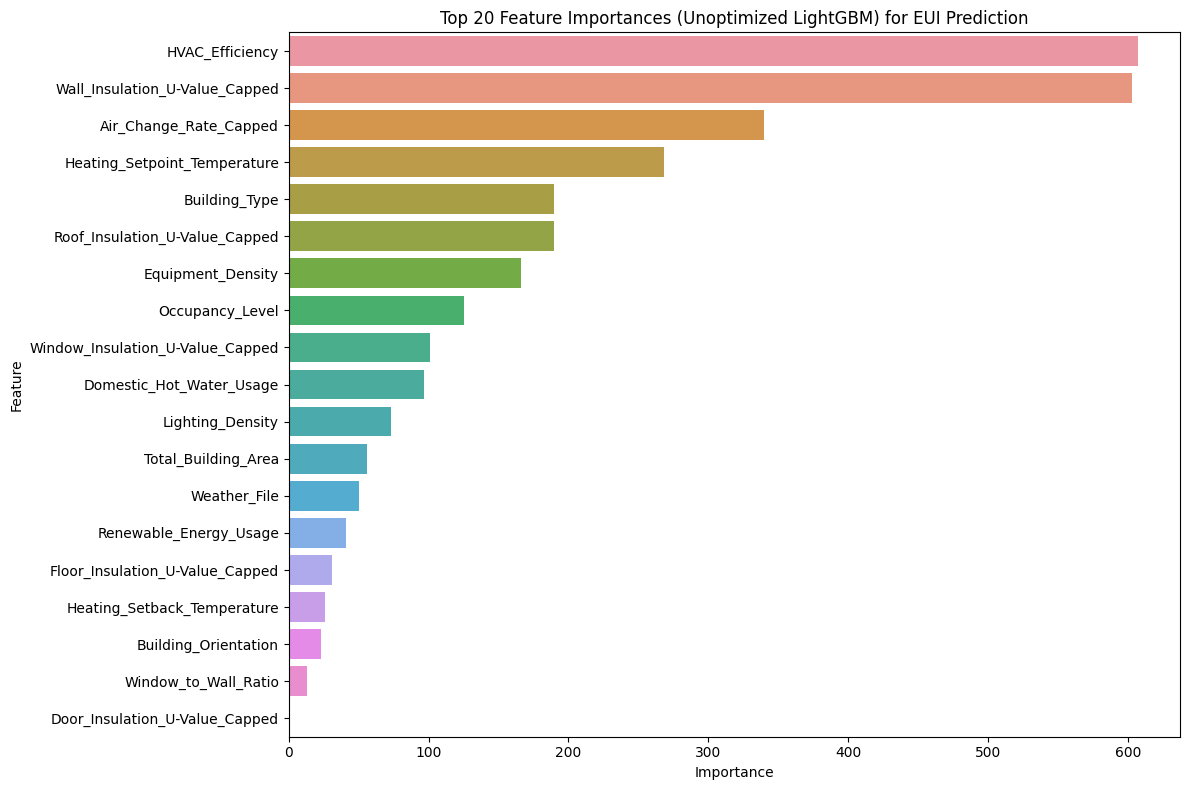


--- Feature Importance from Optimized LightGBM Model ---

Top 20 Most Important Features (Optimized LightGBM):
                         Feature  Importance
                 HVAC_Efficiency        5605
          Air_Change_Rate_Capped        4784
  Wall_Insulation_U-Value_Capped        4263
    Heating_Setpoint_Temperature        2936
Window_Insulation_U-Value_Capped        2913
  Roof_Insulation_U-Value_Capped        2583
 Floor_Insulation_U-Value_Capped        1872
                 Occupancy_Level        1845
                   Building_Type        1832
               Equipment_Density        1748
             Total_Building_Area        1371
        Domestic_Hot_Water_Usage        1266
                Lighting_Density        1134
  Door_Insulation_U-Value_Capped        1010
            Building_Orientation         951
     Heating_Setback_Temperature         923
            Window_to_Wall_Ratio         853
                    Weather_File         666
          Renewable_Energy_Usage 

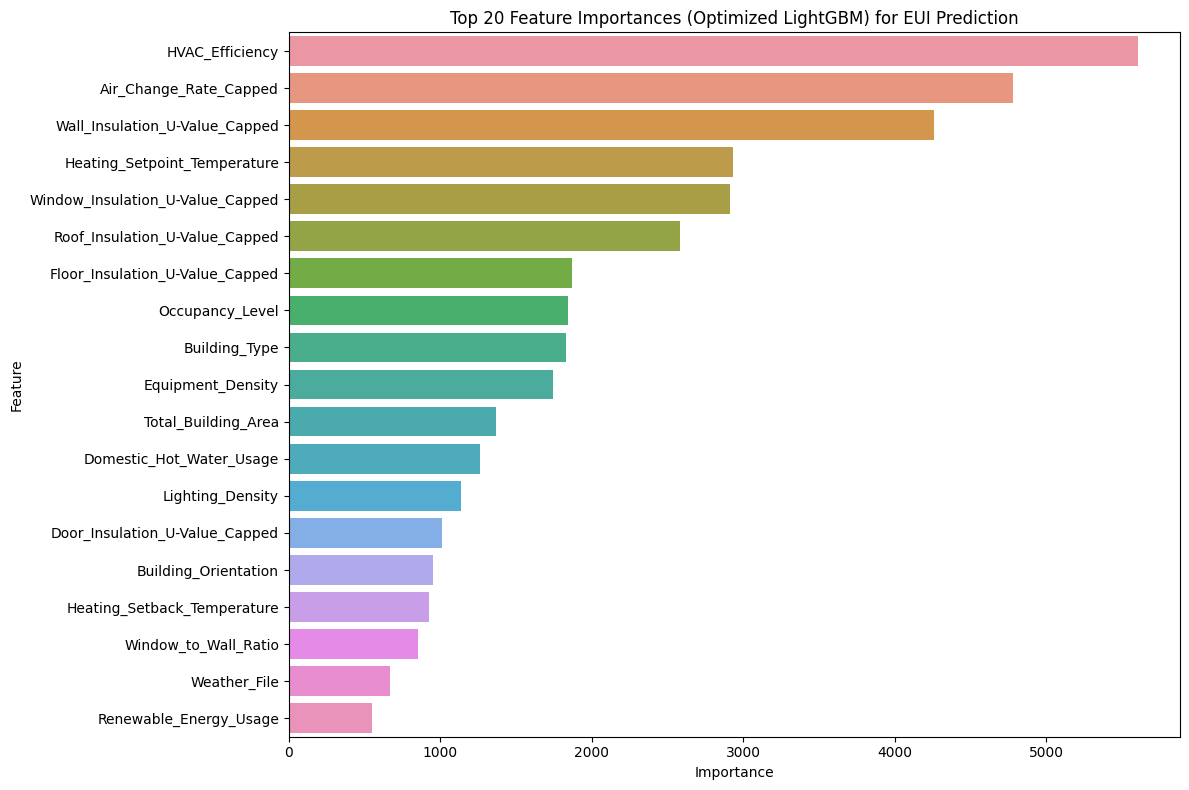

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import numpy as np

# lgbm_model_eui (unoptimized LightGBM)
# lgbm_optimized_eui (optimized LightGBM)

# 1. Feature Importance from Unoptimized LightGBM Model
if 'lgbm_model_eui' in locals():
    print("\n--- Feature Importance from Unoptimized LightGBM Model ---")
    if hasattr(lgbm_model_eui, 'feature_importances_'):
        importances_lgbm_no_opt = lgbm_model_eui.feature_importances_
        feature_names_lgbm = X_train_processed_eui.columns
        feature_importance_df_lgbm_no_opt = pd.DataFrame({'Feature': feature_names_lgbm, 'Importance': importances_lgbm_no_opt})
        feature_importance_df_sorted_lgbm_no_opt = feature_importance_df_lgbm_no_opt.sort_values(by='Importance', ascending=False)
        top_n = 20
        print(f"\nTop {top_n} Most Important Features (Unoptimized LightGBM):")
        print(feature_importance_df_sorted_lgbm_no_opt.head(top_n).to_string(index=False))

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted_lgbm_no_opt.head(top_n))
        plt.title(f'Top {top_n} Feature Importances (Unoptimized LightGBM) for EUI Prediction')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print("\nUnoptimized LightGBM model does not have feature_importances_ attribute. Using Permutation Importance instead.")
        plot_perm_importance(lgbm_model_eui, X_val_perm, y_val_perm, X_train_processed_eui.columns, 'Permutation Feature Importance (Unoptimized LightGBM)')
else:
    print("\nUnoptimized LightGBM model ('lgbm_model_eui') is not available in the current session.")

# 2. Feature Importance from Optimized LightGBM Model
if 'lgbm_optimized_eui' in locals():
    print("\n--- Feature Importance from Optimized LightGBM Model ---")
    if hasattr(lgbm_optimized_eui, 'feature_importances_'):
        importances_lgbm_opt = lgbm_optimized_eui.feature_importances_
        feature_names_lgbm = X_train_processed_eui.columns
        feature_importance_df_lgbm_opt = pd.DataFrame({'Feature': feature_names_lgbm, 'Importance': importances_lgbm_opt})
        feature_importance_df_sorted_lgbm_opt = feature_importance_df_lgbm_opt.sort_values(by='Importance', ascending=False)
        top_n = 20
        print(f"\nTop {top_n} Most Important Features (Optimized LightGBM):")
        print(feature_importance_df_sorted_lgbm_opt.head(top_n).to_string(index=False))

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted_lgbm_opt.head(top_n))
        plt.title(f'Top {top_n} Feature Importances (Optimized LightGBM) for EUI Prediction')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print("\nOptimized LightGBM model does not have feature_importances_ attribute. Using Permutation Importance instead.")
        plot_perm_importance(lgbm_optimized_eui, X_val_perm, y_val_perm, X_train_processed_eui.columns, 'Permutation Feature Importance (Optimized LightGBM)')
else:
    print("\nOptimized LightGBM model ('lgbm_optimized_eui') is not available in the current session.")

In [46]:
!pip install shap lime dice-ml

In [47]:
!pip install --upgrade matplotlib


--- Global Feature Importance from LIME ---

Global Feature Importance from LIME:
                                            Feature     Weight
0                     Air_Change_Rate_Capped > 0.48  98.612795
1           Window_Insulation_U-Value_Capped > 0.48  21.073777
2                          Occupancy_Level <= -0.89  19.222290
3    -0.18 < Wall_Insulation_U-Value_Capped <= 1.06  18.945538
4                   -0.60 < HVAC_Efficiency <= 0.30  17.850699
5                      0.00 < Building_Type <= 1.00  11.825230
6             0.00 < Renewable_Energy_Usage <= 1.00  10.904569
7                       0.00 < Weather_File <= 1.00  10.883611
8              -0.32 < Building_Orientation <= 0.89   6.707496
9                 -0.58 < Equipment_Density <= 0.15   5.856491
10  -0.26 < Floor_Insulation_U-Value_Capped <= 0.42   3.727998
11   -0.21 < Roof_Insulation_U-Value_Capped <= 0.86   3.283840
12                       Total_Building_Area > 0.24   2.109603
13                    Window_to_Wal

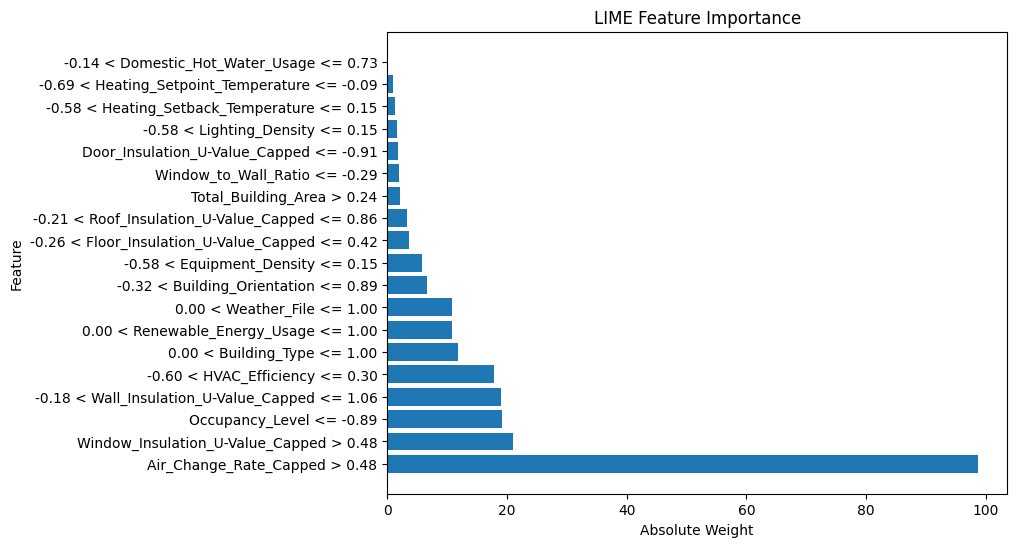

In [62]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("\n--- Global Feature Importance from LIME ---")

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_processed_eui.values,  # Pass the values of the DataFrame
    feature_names=X_train_processed_eui.columns,
    mode='regression'
)

explanation = explainer_lime.explain_instance(
    data_row=X_test_processed_eui.iloc[0,:].values, # Pass the values of the row
    predict_fn=lgbm_optimized_eui.predict,
    num_features=X_test_processed_eui.shape[1]
)

global_importance_lime = pd.DataFrame(explanation.as_list(), columns=['Feature', 'Weight'])
global_importance_lime['Weight'] = global_importance_lime['Weight'].abs()
global_importance_lime = global_importance_lime.sort_values(by='Weight', ascending=False)

print("\nGlobal Feature Importance from LIME:")
print(global_importance_lime)

plt.figure(figsize=(8, 6))
plt.barh(global_importance_lime['Feature'], global_importance_lime['Weight'])
plt.title("LIME Feature Importance")
plt.xlabel("Absolute Weight")
plt.ylabel("Feature")
plt.show()



--- Partial Dependence Plots for All Features ---
Error generating PDP for HVAC_Efficiency: keyword horizontalalignment is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_pick

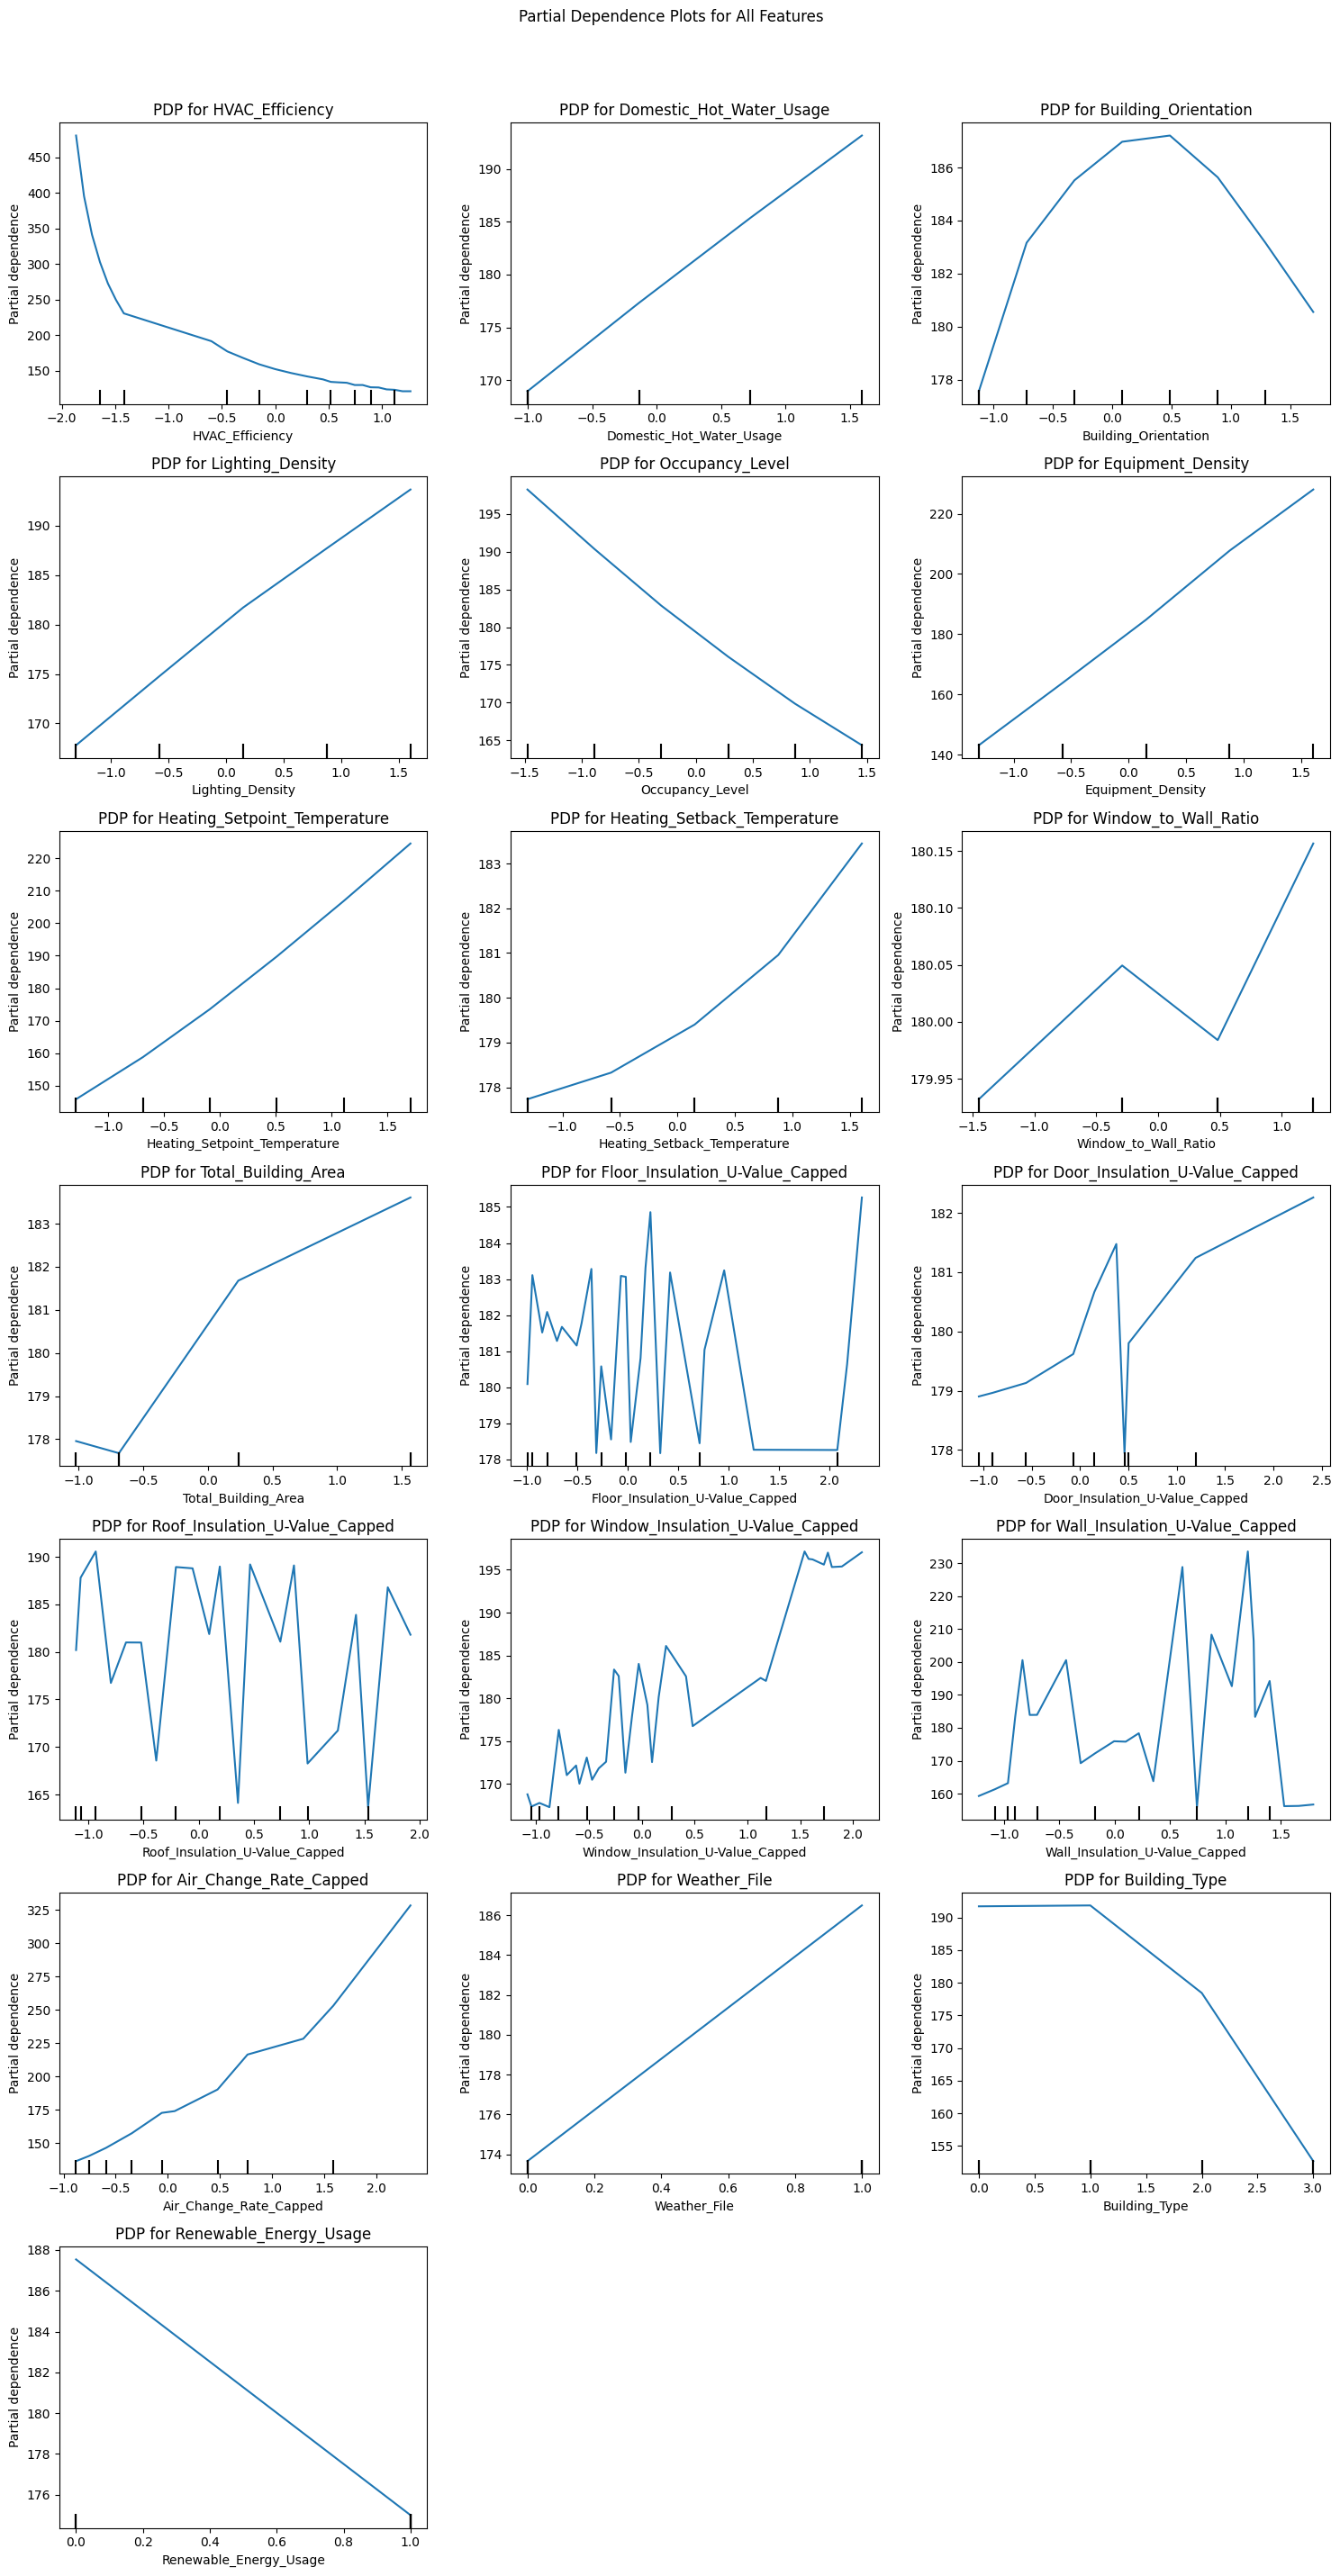

In [57]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# --- Partial Dependence Plots for All Features ---
print("\n--- Partial Dependence Plots for All Features ---")

all_features = X_test_processed_eui.columns.tolist()
num_features = len(all_features)
rows = (num_features + 2) // 3  # Adjust rows based on desired columns
cols = min(num_features, 3)      # Display up to 3 plots per row

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten() # Flatten the axes array for easy indexing

for i, feature in enumerate(all_features):
    try:
        display = PartialDependenceDisplay.from_estimator(
            lgbm_optimized_eui,
            X_test_processed_eui,
            [feature],
            kind='average',
            ax=axes[i]
        )
        axes[i].set_title(f'PDP for {feature}')
        axes[i].tick_params(axis='x', rotation=45, horizontalalignment='right') # Corrected line
    except Exception as e:
        print(f"Error generating PDP for {feature}: {e}")
        axes[i].axis('off') # Turn off axes for the subplot with an error

# Remove any unused subplots
if num_features < rows * cols:
    for j in range(num_features, rows * cols):
        fig.delaxes(axes[j])

fig.suptitle('Partial Dependence Plots for All Features', y=1.02)
plt.tight_layout()
plt.show()


--- Permutation Feature Importance for All Features ---
                         Feature  Permutation Importance
                 HVAC_Efficiency                0.937076
          Air_Change_Rate_Capped                0.506863
    Heating_Setpoint_Temperature                0.157609
               Equipment_Density                0.114539
  Wall_Insulation_U-Value_Capped                0.094312
                   Building_Type                0.088915
                 Occupancy_Level                0.028159
Window_Insulation_U-Value_Capped                0.024310
        Domestic_Hot_Water_Usage                0.018529
  Roof_Insulation_U-Value_Capped                0.016902
                Lighting_Density                0.010934
                    Weather_File                0.008217
             Total_Building_Area                0.007382
          Renewable_Energy_Usage                0.005504
            Building_Orientation                0.005190
     Heating_Setback_Temperatur

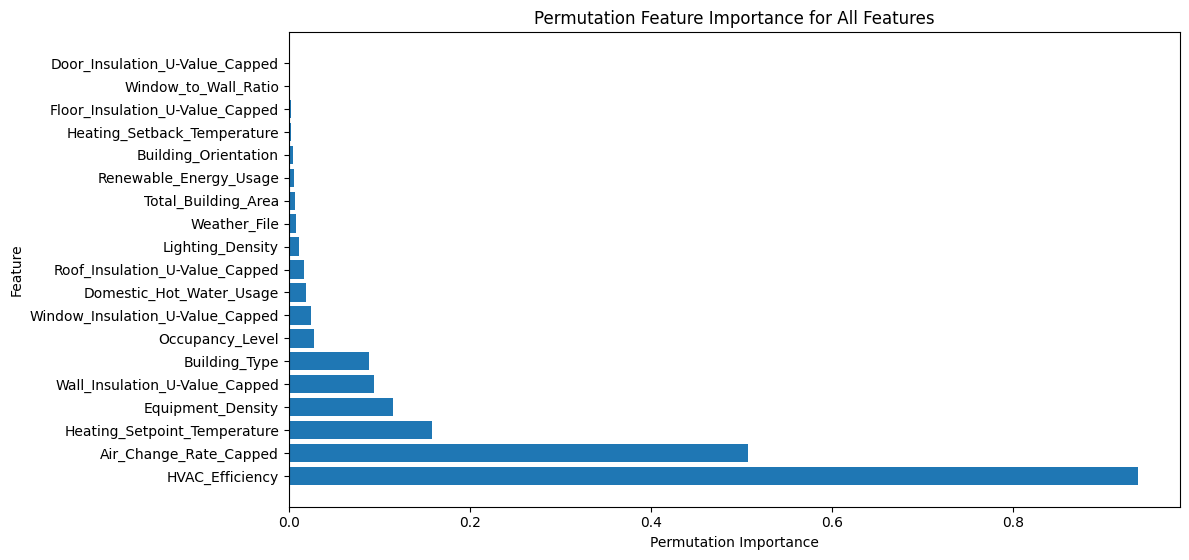

In [58]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("\n--- Permutation Feature Importance for All Features ---")

result = permutation_importance(lgbm_optimized_eui, X_test_processed_eui, y_test_eui, scoring='r2', random_state=42, n_repeats=5) # Reduced n_repeats for speed

importance_perm = pd.DataFrame(list(zip(X_test_processed_eui.columns, result.importances_mean)),
                               columns=['Feature', 'Permutation Importance'])
importance_perm = importance_perm.sort_values(by='Permutation Importance', ascending=False)
print(importance_perm.to_string(index=False))

# Plotting all feature importances (might be a lot)
plt.figure(figsize=(12, len(X_test_processed_eui.columns) * 0.3))
plt.barh(importance_perm['Feature'], importance_perm['Permutation Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for All Features')
plt.tight_layout()
plt.show()


--- SHAP Analysis for LightGBM (Optimized EUI)---


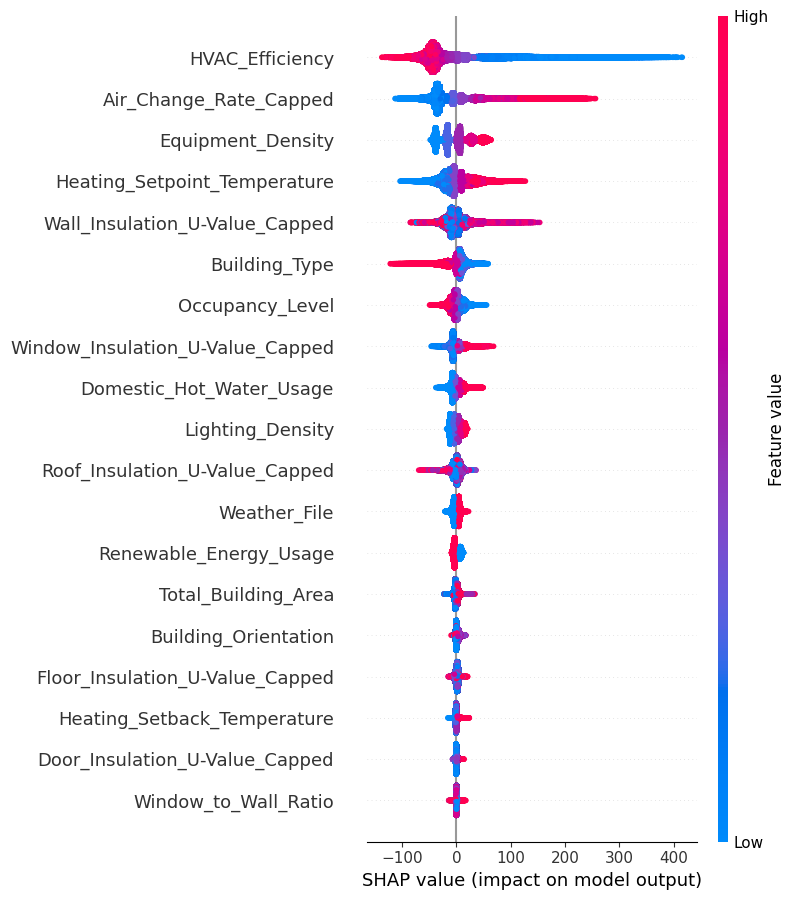


SHAP Feature Importance for LightGBM (Optimized EUI):
                         Feature  SHAP Importance
                 HVAC_Efficiency        59.260864
          Air_Change_Rate_Capped        44.136191
               Equipment_Density        25.200768
    Heating_Setpoint_Temperature        22.910010
  Wall_Insulation_U-Value_Capped        16.524587
                   Building_Type        13.798459
                 Occupancy_Level        10.058751
Window_Insulation_U-Value_Capped         8.949972
        Domestic_Hot_Water_Usage         8.764428
                Lighting_Density         7.990944
  Roof_Insulation_U-Value_Capped         6.700999
                    Weather_File         6.310454
          Renewable_Energy_Usage         5.653437
             Total_Building_Area         2.772788
            Building_Orientation         2.329661
 Floor_Insulation_U-Value_Capped         2.250309
     Heating_Setback_Temperature         1.799072
  Door_Insulation_U-Value_Capped         1.12

In [59]:
import shap
import matplotlib.pyplot as plt

print("\n--- SHAP Analysis for LightGBM (Optimized EUI)---")

# Create a SHAP explainer for your model
explainer_shap = shap.TreeExplainer(lgbm_optimized_eui)

# Calculate SHAP values for the test set
shap_values = explainer_shap.shap_values(X_test_processed_eui)

# Visualize the SHAP values for a single instance (e.g., the first instance)
shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values[0,:], X_test_processed_eui.iloc[0,:], show=True)

# Summarize the impact of each feature over the entire test set
shap.summary_plot(shap_values, X_test_processed_eui)
plt.show()

# Feature importance based on SHAP values
shap_importance = pd.DataFrame(list(zip(X_test_processed_eui.columns, np.abs(shap_values).mean(axis=0))),
                                columns=['Feature', 'SHAP Importance'])
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)
print("\nSHAP Feature Importance for LightGBM (Optimized EUI):")
print(shap_importance.head(20).to_string(index=False))